In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          4.1                         
year           2024                        
month          06                          
day            14                          
svn rev        86737                       
language       R                           
version.string R version 4.4.1 (2024-06-14)
nickname       Race for Your Life          

In [2]:
library(Seurat)
packageVersion("Seurat")
library(ggplot2)
library(dplyr)
library(pheatmap)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




[1] ‘5.1.0’


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Read in CatsCradle

In [3]:
library("CatsCradle")

Warning message:
“replacing previous import ‘Rfast::transpose’ by ‘data.table::transpose’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘Rfast::nth’ by ‘dplyr::nth’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘dplyr::as_data_frame’ by ‘igraph::as_data_frame’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘Seurat::components’ by ‘igraph::components’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘dplyr::groups’ by ‘igraph::groups’ when loading ‘CatsCradle’”
Warning message:
“replacing previous import ‘Rfast::knn’ by ‘igraph::knn’ when loading ‘CatsCradle’”
Warning m

Read in data

In [4]:
setwd("/project/data/gew123/Spatial/CatsCradle/data/")  # Set working directory

In [5]:
spatial <- readRDS(file = "/project/data/gew123/Spatial/CatsCradle/data/spatial_annotated_seurat.rds")
spatial

An object of class Seurat 
1000 features across 182735 samples within 1 assay 
Active assay: originalexp (1000 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, UMAP, spatial

#### Analysis - all tissues

In [7]:
# Print metadata
spatial@meta.data

orig.ident    nCount_originalexp nFeature_originalexp fov Area 
3_1     SeuratProject  92                 75                  1   10996
5_1     SeuratProject  47                 35                  1    9341
6_1     SeuratProject  83                 43                  1    4901
7_1     SeuratProject  12                 11                  1    8042
8_1     SeuratProject  44                 34                  1    3137
9_1     SeuratProject  26                 17                  1    7799
10_1    SeuratProject 157                 98                  1    6971
11_1    SeuratProject  81                 59                  1    6263
12_1    SeuratProject  19                 11                  1    4042
13_1    SeuratProject  31                 20                  1    5822
14_1    SeuratProject  90                 54                  1    6774
15_1    SeuratProject 175                136                  1    7644
17_1    SeuratProject  49                 47                  1    7221
18_1    SeuratProject 228                136                  1    5768
19_1    SeuratProject  17                 17                  1    5303
21_1    SeuratProject 102                 66                  1    3872
22_1    SeuratProject  62                 48                  1    5067
23_1    SeuratProject  24                 19                  1    6813
24_1    SeuratProject 174                126                  1    5376
25_1    SeuratProject  21                 21                  1    2949
26_1    SeuratProject 134                 98                  1    4074
27_1    SeuratProject 137                100                  1    3263
28_1    SeuratProject  92                 78                  1    2919
29_1    SeuratProject  17                 15                  1    2047
30_1    SeuratProject  19                 18                  1    3435
31_1    SeuratProject  73                 62                  1    6240
32_1    SeuratProject  20                 20                  1    5680
34_1    SeuratProject 427                286                  1   11253
35_1    SeuratProject  73                 71                  1    6180
36_1    SeuratProject  89                 66                  1   21208
⋮       ⋮             ⋮                  ⋮                    ⋮   ⋮    
446_202 SeuratProject 357                196                  202  5856
447_202 SeuratProject  99                 71                  202  3876
448_202 SeuratProject 302                155                  202  7507
449_202 SeuratProject 124                 81                  202  3414
450_202 SeuratProject 275                149                  202  5542
451_202 SeuratProject 324                160                  202  6580
452_202 SeuratProject 154                 89                  202  5819
453_202 SeuratProject 102                 61                  202  7871
454_202 SeuratProject 118                 75                  202  2984
455_202 SeuratProject 373                178                  202  7852
456_202 SeuratProject 104                 70                  202  5523
457_202 SeuratProject 179                111                  202  4601
458_202 SeuratProject 184                105                  202  6053
459_202 SeuratProject 315                174                  202  6697
460_202 SeuratProject 181                106                  202  5870
461_202 SeuratProject  98                 58                  202  3080
462_202 SeuratProject 192                116                  202  7234
463_202 SeuratProject 160                104                  202  7016
464_202 SeuratProject 104                 70                  202 11840
465_202 SeuratProject 152                 80                  202  3068
466_202 SeuratProject 129                 78                  202  4474
467_202 SeuratProject  57                 46                  202  3940
468_202 SeuratProject 218                116                  202  5344
469_202 SeuratProject  91                 67    

In [7]:
# Set idents (cell types)
Idents(spatial) = spatial@meta.data$broad_annotations
levels(Idents(spatial))

[1] "Adrenal cortex"              "B cells"                    
 [3] "Bridge"                      "Chromaffin"                 
 [5] "Connecting progenitor cells" "Endothelial"                
 [7] "Mesenchymal"                 "Myeloid cells"              
 [9] "Myofibroblasts"              "Neuroblasts"                
[11] "SCPs"                        "T cells"

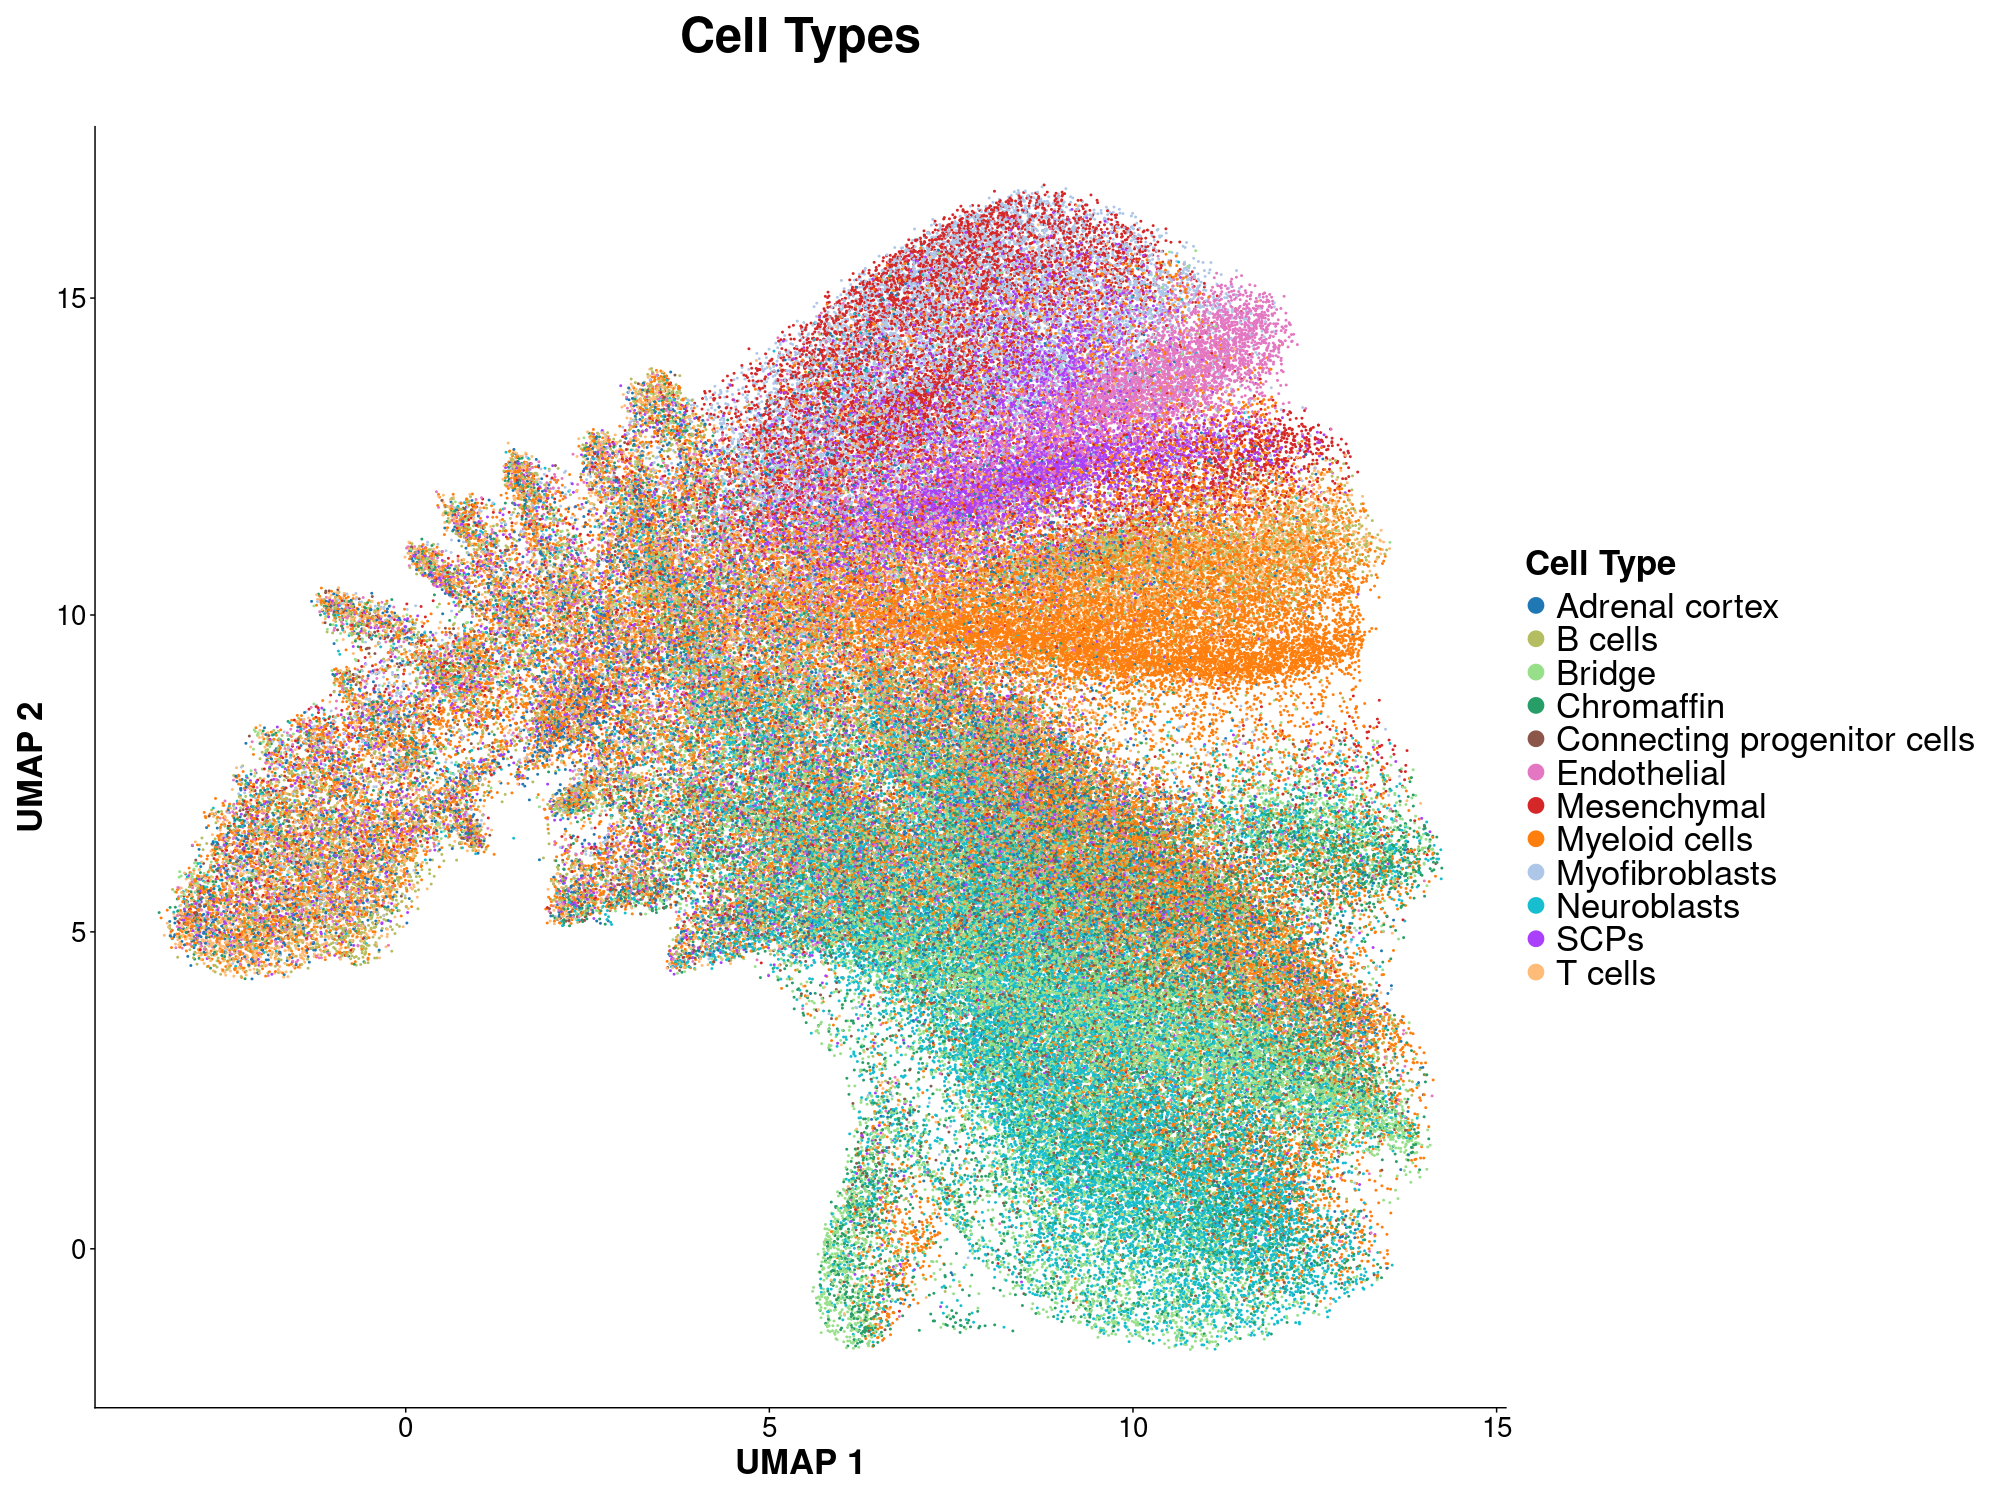

In [27]:
# Plot
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
DimPlot(spatial,raster=FALSE, pt.size=0.35, 
       cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31')) + theme(axis.title=element_text(size=25,face = "bold"),
                axis.text=element_text(size=20), 
                plot.title=element_text(size=35, hjust = 0.5),
                legend.text=element_text(size=25),
                legend.title=element_text(size=25,face = "bold")) +
# Setting labels
labs(
    x = "UMAP 1",
    y = "UMAP 2",
    color = "Cell Type",
    title = "Cell Types\n",
  ) + guides(color = guide_legend(override.aes = list(size = 5)))
                    

In [8]:
# Extract cell centroids (coordinates)
cell_centroids = data.frame(y = spatial$CenterX_global_px, x = spatial$CenterY_global_px, cell = colnames(spatial))
centroid_data = list("centroids" = CreateCentroids(cell_centroids))
coords = CreateFOV(coords = centroid_data, type = c("centroids"), assay = "RNA")

spatial[["global"]] = coords

centroids = GetTissueCoordinates(spatial)
rownames(centroids) = centroids$cell

Warning message:
“Adding image data that isn't associated with any assays”


In [9]:
centroids = GetTissueCoordinates(spatial)

In [10]:
rownames(centroids) = centroids$cell

In [11]:
# Extracting clusters
clusters = spatial@active.ident

### Neighborhoods method 1: Delaunay

In [ ]:
# Delaunay triangulation computes neighborhoods of cells and their immediate neighbors using cell centroids

# Two cells are neighbors if they appear on the same row

In [12]:
delaunayNeighbours = computeNeighboursDelaunay(centroids)
head(delaunayNeighbours)

nodeA  nodeB  
1 17_4   534_4  
2 234_61 437_109
3 404_62 405_62 
4 10_4   17_4   
5 268_4  534_4  
6 71_4   268_4

In [17]:
# Checking neighborhood of first row
idx = (delaunayNeighbours$nodeA == "17_4" |
       delaunayNeighbours$nodeB == "534_4")
nbhd = unique(c(delaunayNeighbours$nodeA[idx],
                delaunayNeighbours$nodeB[idx]))
length(nbhd) 

[1] 7

In [13]:
# Can also get extended neighbors
extendedNeighboursList = getExtendedNBHDs(delaunayNeighbours, 4)
extendedNeighbours = collapseExtendedNBHDs(extendedNeighboursList, 4)

radius 2
radius 3
radius 4


In [14]:
# Save extended neighbors list
write.csv(extendedNeighbours, file = "extended_neighbors.csv", row.names = FALSE)

In [15]:
# Now check neighbor hood including extended neighbors to a combinatorial radius 4
idx = (extendedNeighbours$nodeA == "17_4" |
       extendedNeighbours$nodeB == "534_4")
nbhd = unique(c(extendedNeighbours$nodeA[idx],
                extendedNeighbours$nodeB[idx]))
length(nbhd)

[1] 223

In [46]:
# Save
saveRDS(spatial, "/project/data/gew123/Spatial/CatsCradle/data/catscradle_neighborhoods.rds")

In [14]:
# Checkpoint
spatial <- readRDS(file = "/project/data/gew123/Spatial/CatsCradle/data/catscradle_neighborhoods.rds")
spatial

An object of class Seurat 
1000 features across 182735 samples within 1 assay 
Active assay: originalexp (1000 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, UMAP, spatial
 1 spatial field of view present: global

### Computing by cell type

In [16]:
# Neighbors by cell type
NBHDByCTMatrix = computeNBHDByCTMatrix(delaunayNeighbours, clusters)

IGRAPH 4e8f25b DNW- 12 92 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from 4e8f25b (vertex names):
 [1] Adrenal cortex->B cells        Adrenal cortex->Bridge        
 [3] Adrenal cortex->Chromaffin     Adrenal cortex->Endothelial   
 [5] Adrenal cortex->Mesenchymal    Adrenal cortex->Myeloid cells 
 [7] Adrenal cortex->Myofibroblasts Adrenal cortex->Neuroblasts   
 [9] Adrenal cortex->SCPs           Adrenal cortex->T cells       
[11] B cells       ->Adrenal cortex B cells       ->Bridge        
[13] B cells       ->Chromaffin     B cells       ->Endothelial   
+ ... omitted several edges

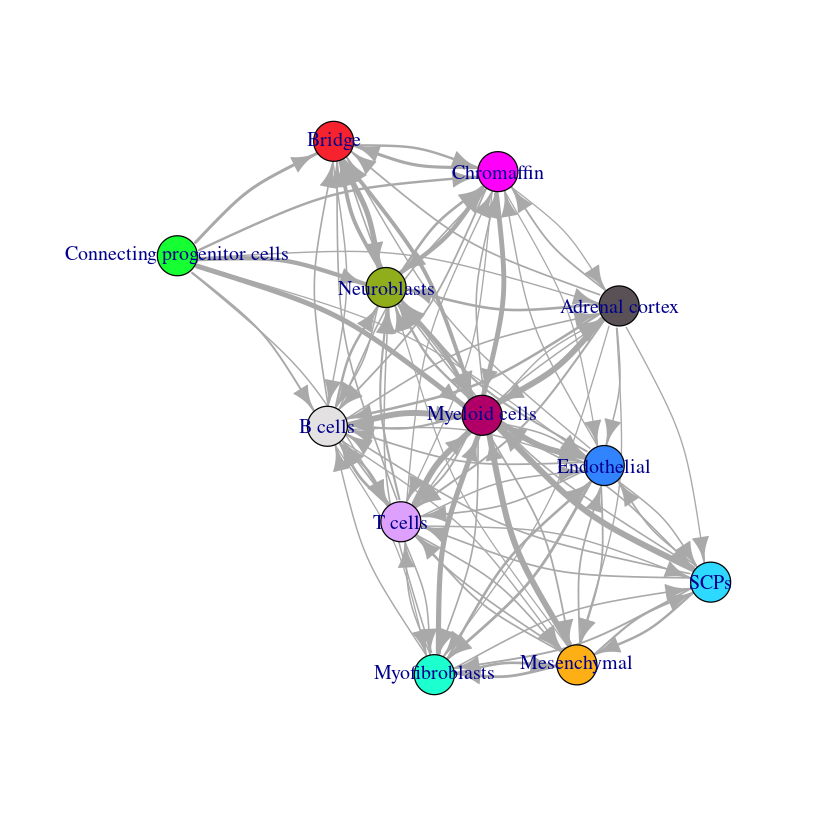

In [17]:
# Then calculate matrix of fraction of contacts cell types make with other cell types
cellTypesPerCellTypeMatrix = 
  computeCellTypesPerCellTypeMatrix(NBHDByCTMatrix,clusters)

# Display contact matrix 
# Only display contact based interactions constituting at least 5% 
    # of interactions
colours = DiscretePalette(length(levels(clusters)), palette = "polychrome")
names(colours) = levels(clusters)

cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrix, 
                                    minWeight = 0.05, colours = colours)

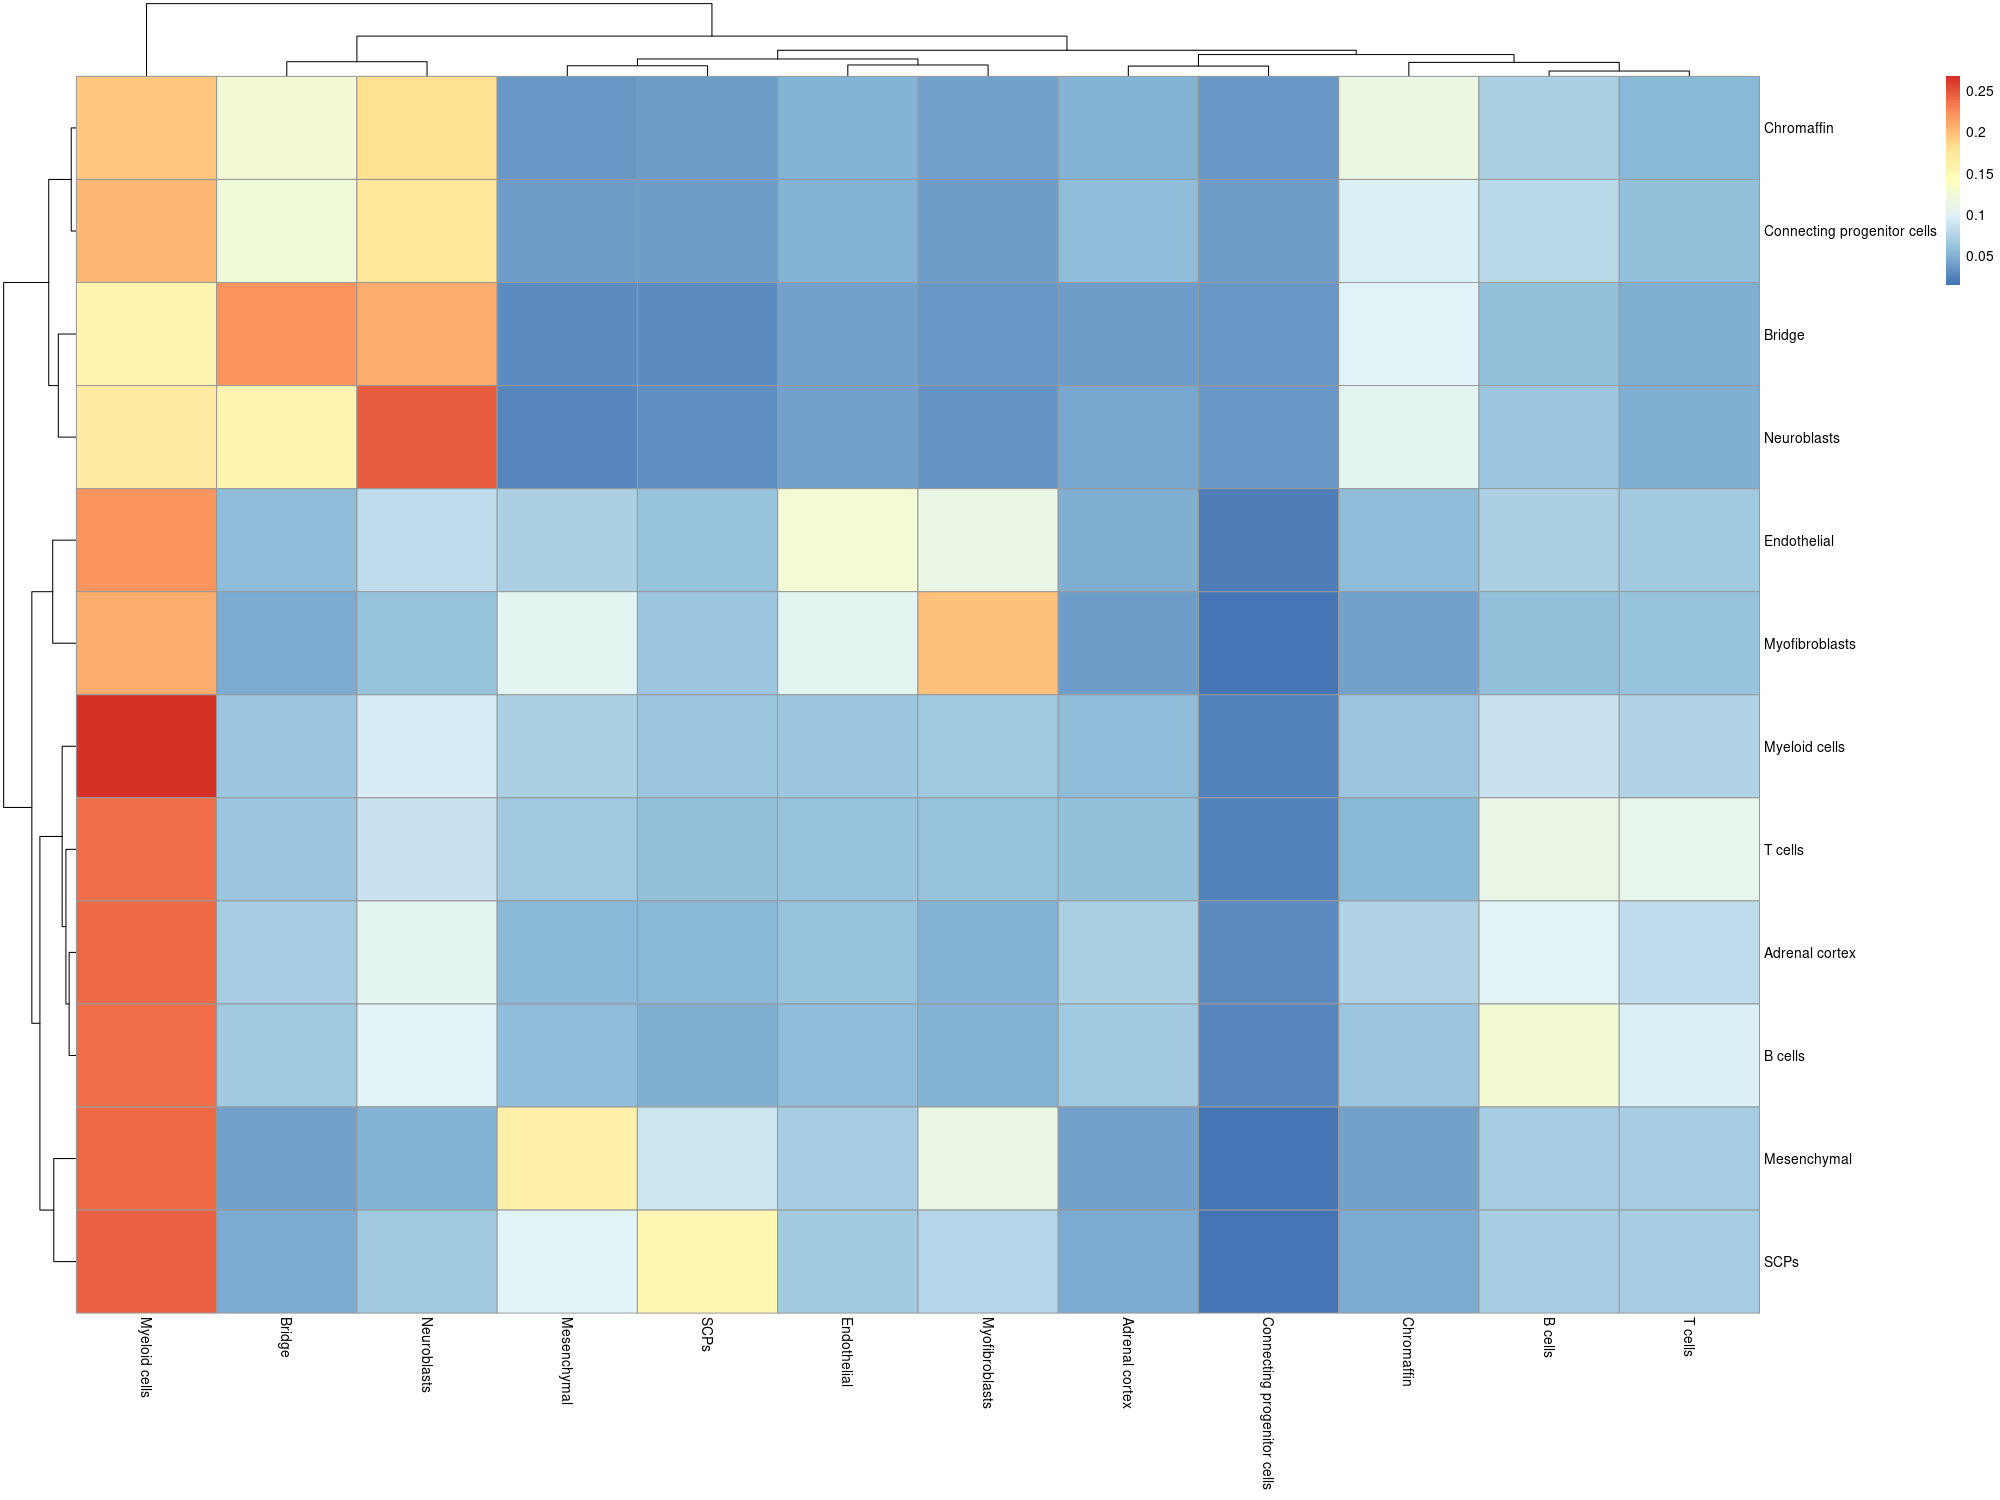

In [63]:
library(pheatmap,quietly=TRUE)
pheatmap(cellTypesPerCellTypeMatrix)

### Compute for extended neighbors

In [17]:
# Compute extended neighborhood by cell type matrix
NBHDByCTMatrixExtended = 
  computeNBHDByCTMatrix(extendedNeighbours, clusters)

In [22]:
head(NBHDByCTMatrixExtended)

Adrenal cortex B cells Bridge Chromaffin Connecting progenitor cells
3_1 25             33      7      13         6                          
5_1 13             11      5       6         2                          
6_1 13             12      4       8         2                          
7_1 13             15      6       9         2                          
8_1  9              5      3       6         2                          
9_1  7              5      2       6         2                          
    Endothelial Mesenchymal Myeloid cells Myofibroblasts Neuroblasts SCPs
3_1 19          32          76            23             12          15  
5_1 13          21          46            14              9           6  
6_1 11          17          41            13              7           6  
7_1 13          19          42            12              6           6  
8_1  8          11          29            10              5           1  
9_1  9          11          29             9              5           1  
    T cells
3_1 21     
5_1 11     
6_1 11     
7_1 12     
8_1  6     
9_1  4

In [23]:
dim(NBHDByCTMatrixExtended)

[1] 182735     12

In [21]:
dim(cellTypesPerCellTypeMatrixExtended)

[1] 12 12

In [ ]:
# Plot neighborhood by cell type matrix and save
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

setwd('/project/data/gew123/Spatial/Figures/catscradle')
ggsave(filename="neighborhoods_by_celltype_extended_heatmap.png",
       plot=pheatmap(NBHDByCTMatrixExtended,
                     fontsize=6
                    ))

Saving 6.67 x 6.67 in image


In [20]:
# Compute extended contacts matrix
cellTypesPerCellTypeMatrixExtended = computeCellTypesPerCellTypeMatrix(NBHDByCTMatrixExtended, clusters)

In [36]:
# Plot contact network and save
setwd('/project/data/gew123/Spatial/Figures/catscradle')

png(filename = "cellcontacts_extended_network.png", width = 1000, height = 1000)
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)
cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrixExtended,
    minWeight = 0.05, colours = colours)
dev.off()

IGRAPH 2d0aa07 DNW- 12 107 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from 2d0aa07 (vertex names):
 [1] Adrenal cortex->B cells        Adrenal cortex->Bridge        
 [3] Adrenal cortex->Chromaffin     Adrenal cortex->Endothelial   
 [5] Adrenal cortex->Mesenchymal    Adrenal cortex->Myeloid cells 
 [7] Adrenal cortex->Myofibroblasts Adrenal cortex->Neuroblasts   
 [9] Adrenal cortex->SCPs           Adrenal cortex->T cells       
[11] B cells       ->Adrenal cortex B cells       ->Bridge        
[13] B cells       ->Chromaffin     B cells       ->Endothelial   
+ ... omitted several edges

png 
  2

Saving 6.67 x 6.67 in image


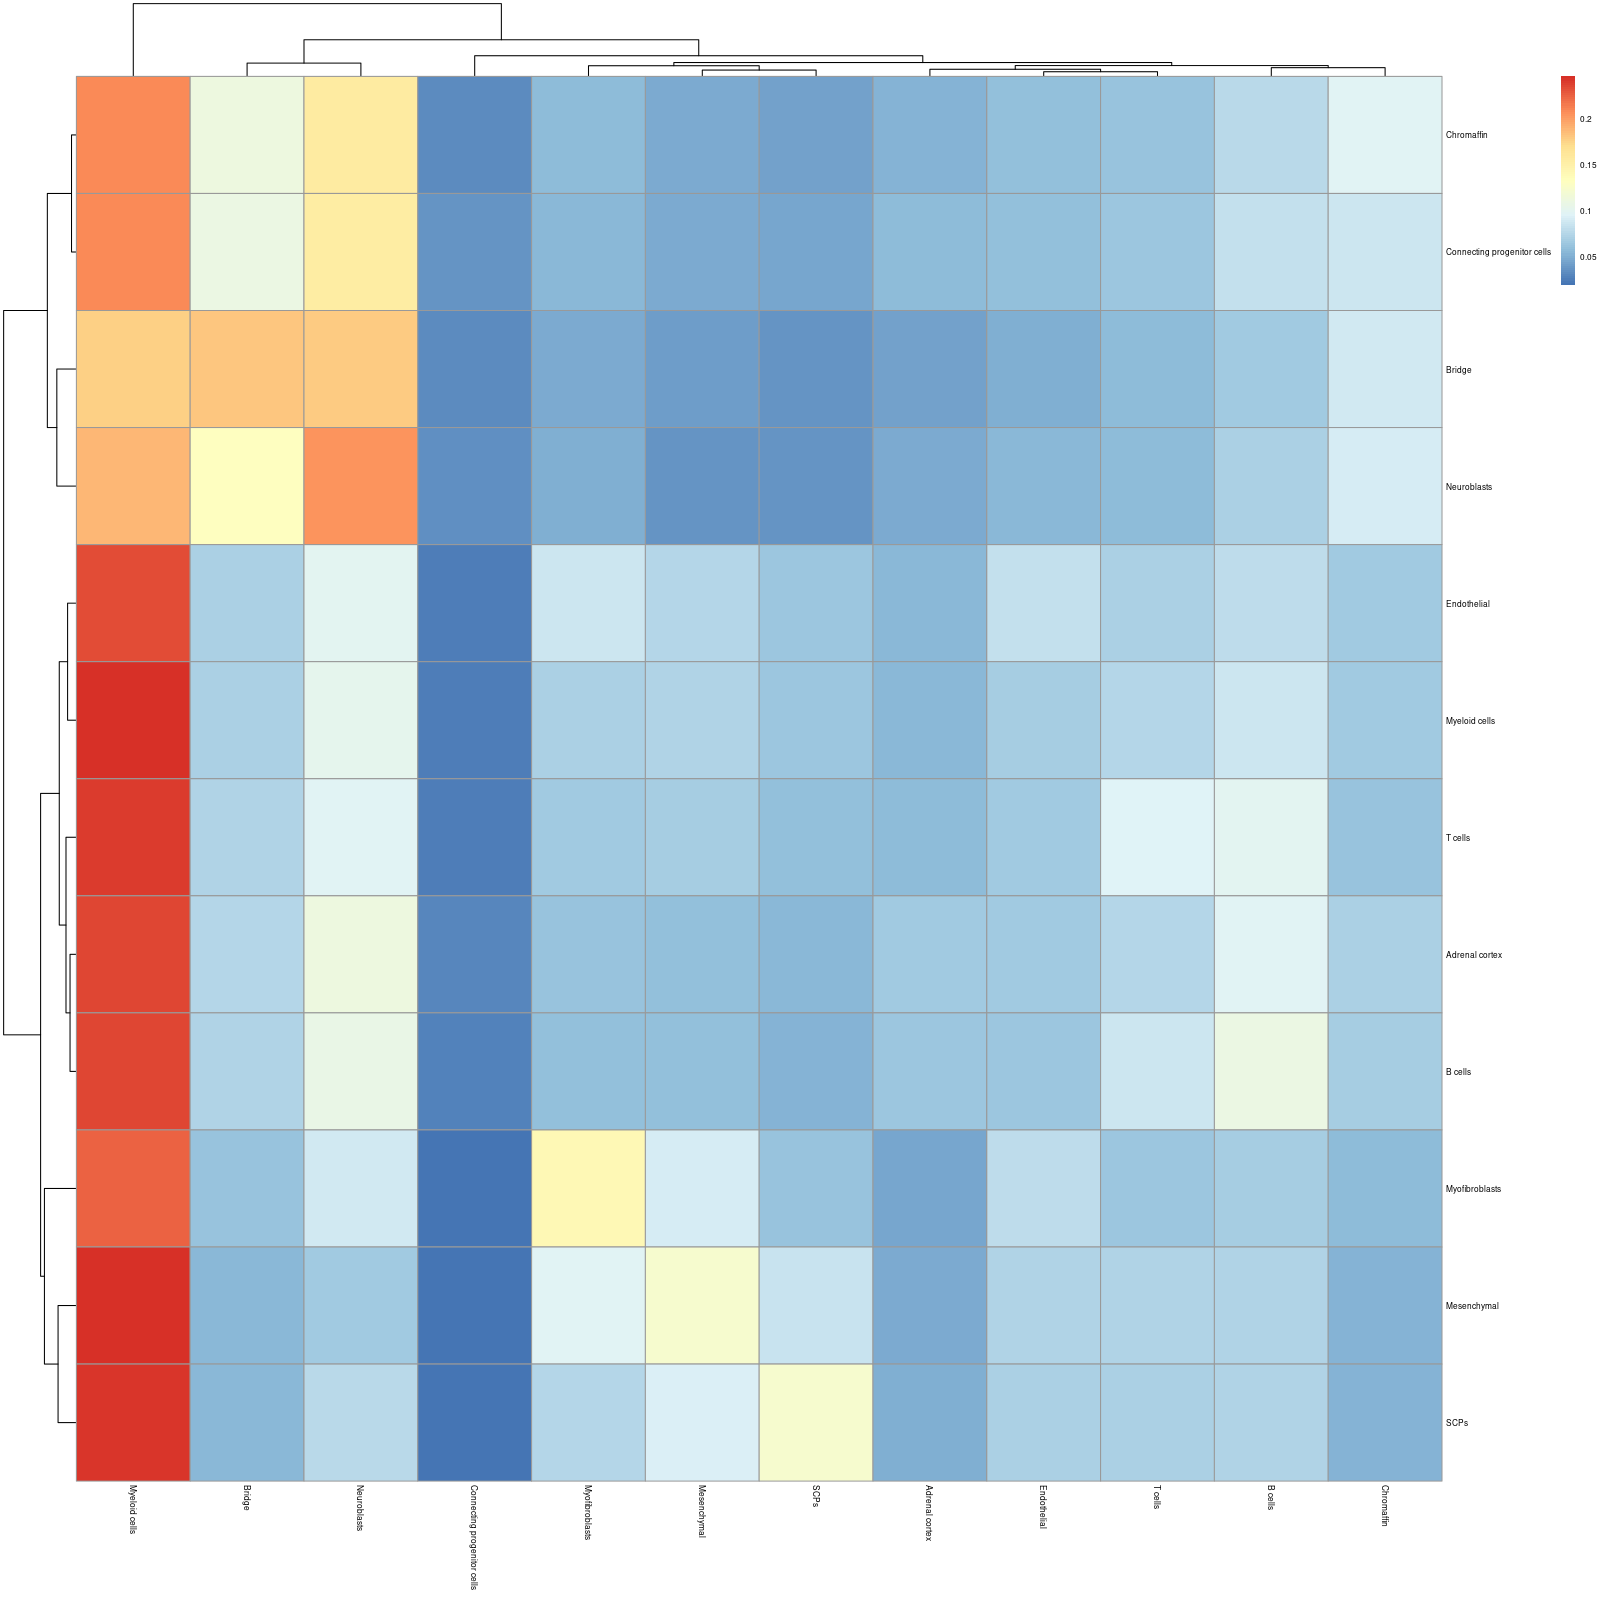

In [45]:
# Plot contact matrix and save
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

setwd('/project/data/gew123/Spatial/Figures/catscradle')
ggsave(filename="cellcontacts_extended_heatmap.png",
       plot=pheatmap(cellTypesPerCellTypeMatrixExtended,
                     fontsize=6
                    ))

### Calculate for fine annotations

In [47]:
# Reset idents to fine annotations
Idents(spatial) = spatial@meta.data$fine_annotations
levels(Idents(spatial))

clusters = spatial@active.ident

[1] "Adrenal cortex"              "B cells"                    
 [3] "Bridge cells"                "Chromaffin cells"           
 [5] "Connecting progenitor cells" "Cytotoxic (CD8+) T cells"   
 [7] "Endothelial cells"           "Helper (CD4+) T cells"      
 [9] "Macrophages/monocytes"       "Mast cells"                 
[11] "Mesenchymal cells"           "Myofibroblasts"             
[13] "NK cells"                    "Naïve T cells"              
[15] "Neuroblasts"                 "Plasma cells"               
[17] "Proliferating T cells"       "SCPs"

In [48]:
# Extended neighbors by cell type
NBHDByCTMatrixExtended = 
  computeNBHDByCTMatrix(extendedNeighbours, clusters)

IGRAPH edad5ea DNW- 18 164 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from edad5ea (vertex names):
 [1] Adrenal cortex->B cells               Adrenal cortex->Bridge cells         
 [3] Adrenal cortex->Chromaffin cells      Adrenal cortex->Endothelial cells    
 [5] Adrenal cortex->Macrophages/monocytes Adrenal cortex->Mast cells           
 [7] Adrenal cortex->Mesenchymal cells     Adrenal cortex->Myofibroblasts       
 [9] Adrenal cortex->Neuroblasts           Adrenal cortex->SCPs                 
[11] B cells       ->Adrenal cortex        B cells       ->Bridge cells         
[13] B cells       ->Chromaffin cells      B cells       ->Endothelial cells    
+ ... omitted several edges

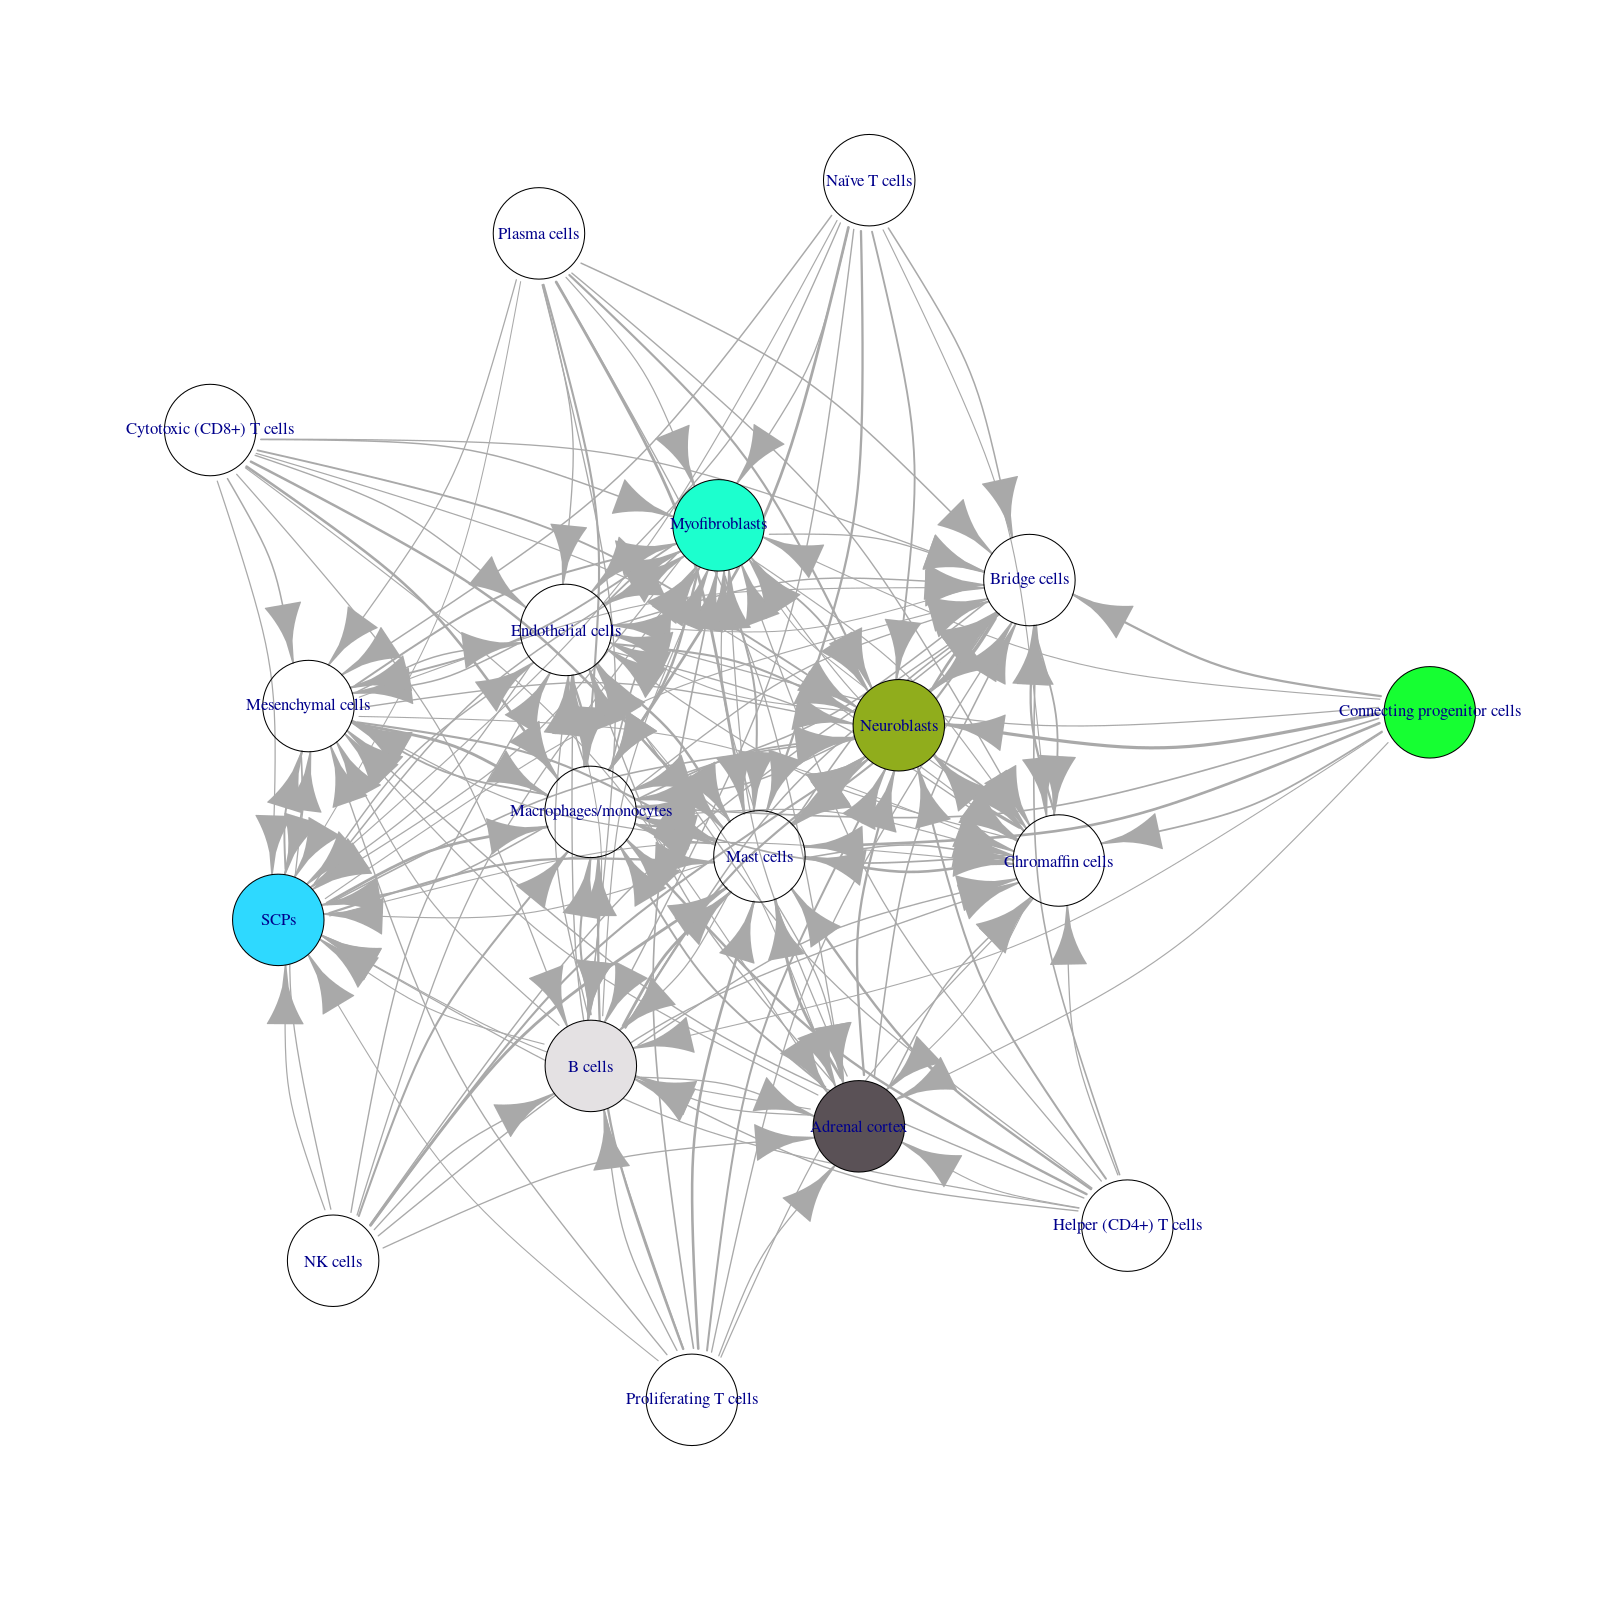

In [50]:
cellTypesPerCellTypeMatrixExtended = computeCellTypesPerCellTypeMatrix(NBHDByCTMatrixExtended, clusters)

# Plot and save
# setwd('/project/data/gew123/Spatial/Figures/catscradle')

# png(filename = "cellcontacts_extended_network.png", width = 1000, height = 1000)
cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrixExtended,
    minWeight = 0.05, colours = colours)
# dev.off()

In [ ]:
spatial <- readRDS(file = "/project/data/gew123/Spatial/CatsCradle/data/catscradle_neighborhoods.rds")

### Get aggregate gene expression

In [87]:
agg = aggregateSeuratGeneExpression(spatial,extendedNeighbours,
                                    verbose=FALSE)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [ ]:
# Save
saveRDS(agg, file="/project/data/gew123/Spatial/CatsCradle/data/catscradle_agg.rds")

In [ ]:
spatial$aggregateNBHDClusters = agg@active.ident
ImageDimPlot(spatial,group.by='aggregateNBHDClusters',cols='polychrome',
             size=1)

Warning message:
“No FOV associated with assay 'originalexp', using global default FOV”


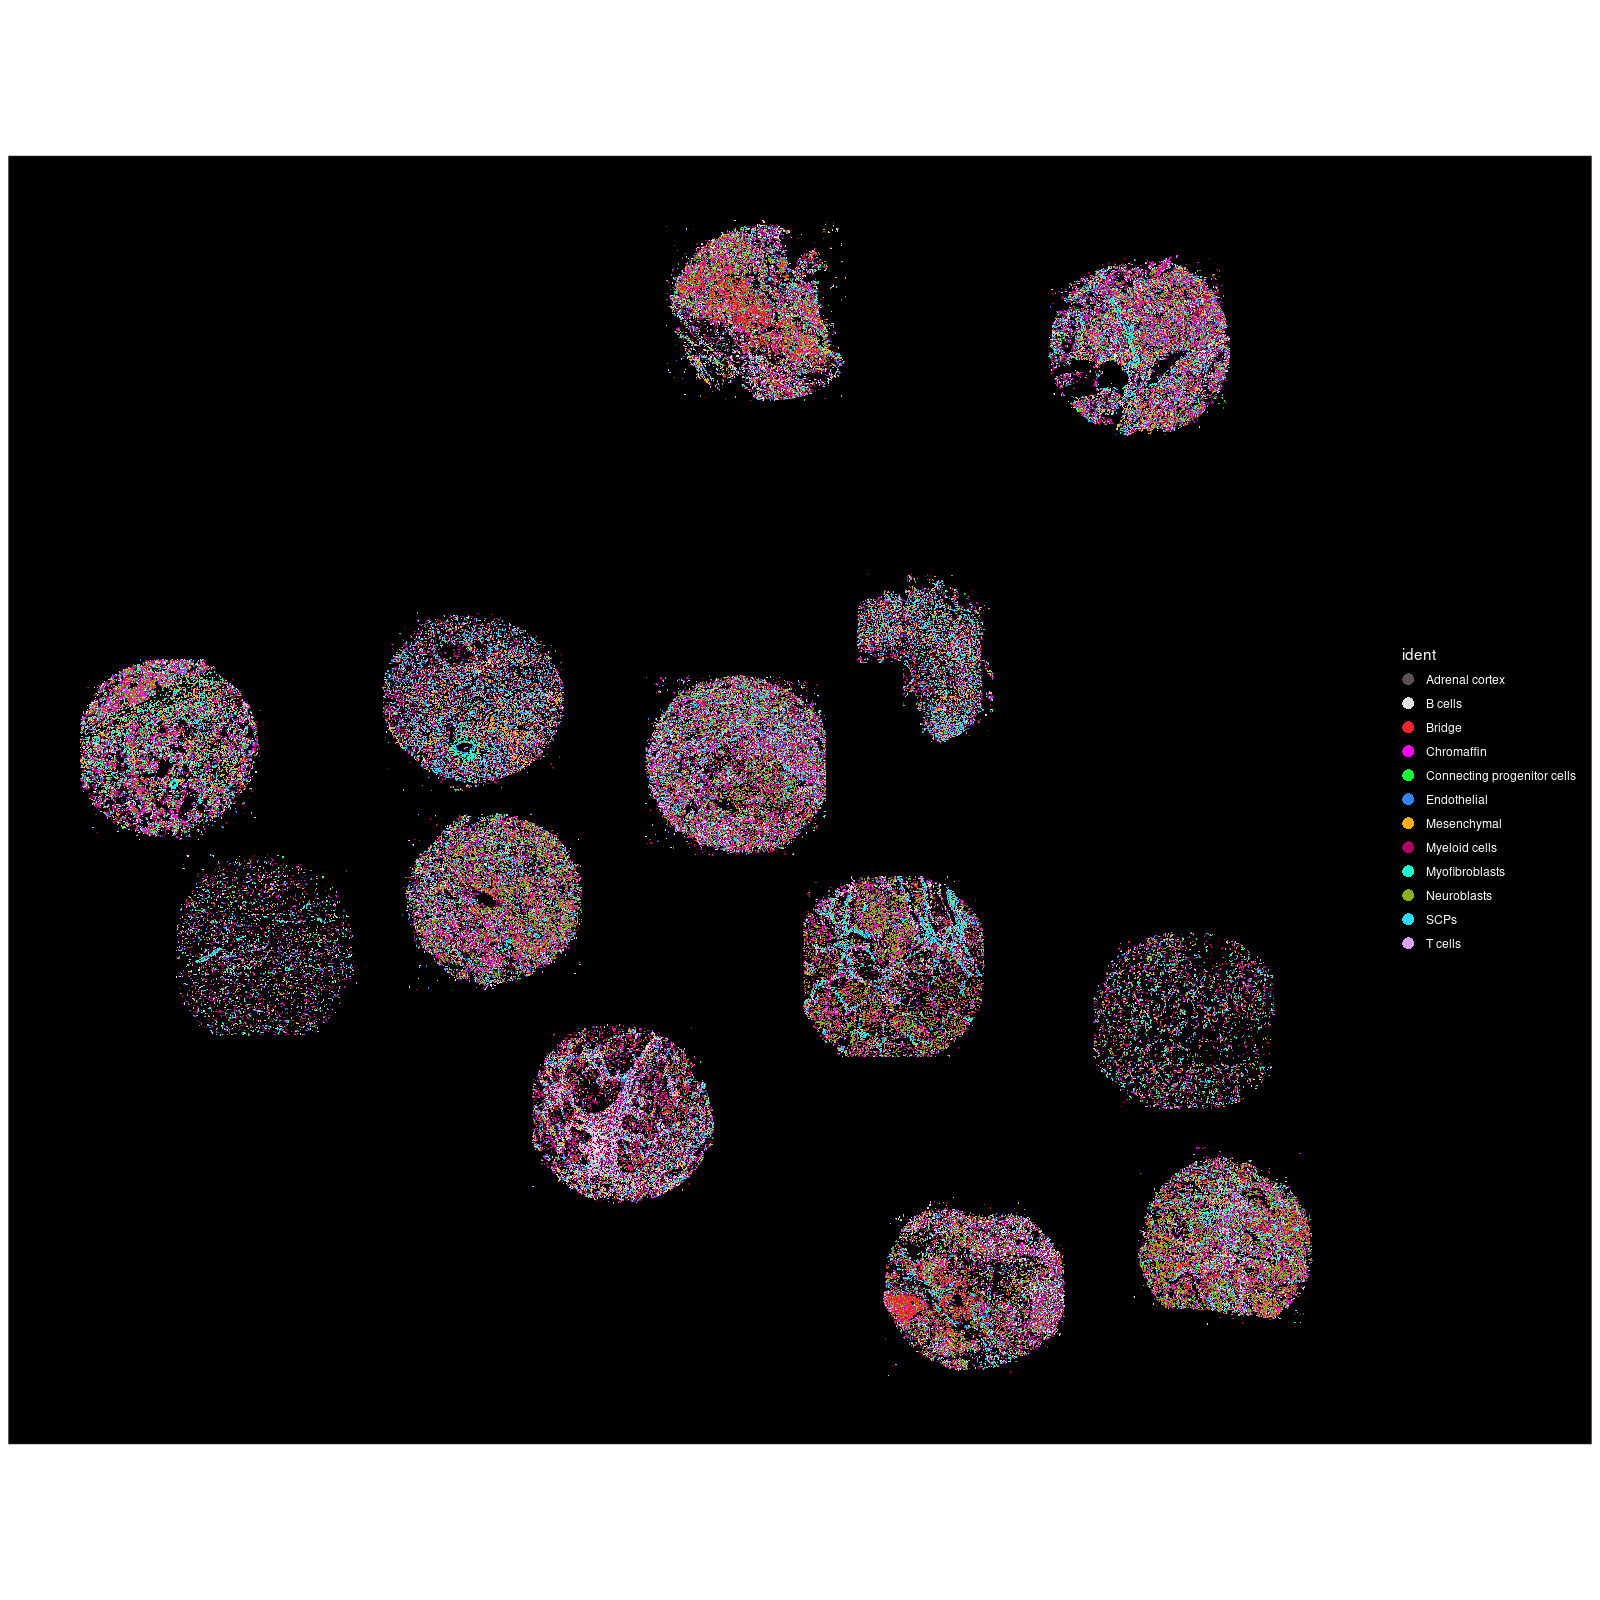

In [77]:
ImageDimPlot(spatial,cols='polychrome')

#### Analysis - Individual tissues

In [6]:
spatial

An object of class Seurat 
1000 features across 182735 samples within 1 assay 
Active assay: originalexp (1000 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, UMAP, spatial

In [8]:
head(spatial@meta.data)

orig.ident    nCount_originalexp nFeature_originalexp fov Area  AspectRatio
3_1 SeuratProject 92                 75                   1   10996 2.06       
5_1 SeuratProject 47                 35                   1    9341 0.82       
6_1 SeuratProject 83                 43                   1    4901 1.26       
7_1 SeuratProject 12                 11                   1    8042 0.76       
8_1 SeuratProject 44                 34                   1    3137 0.72       
9_1 SeuratProject 26                 17                   1    7799 0.95       
    CenterX_global_px CenterY_global_px Width Height ⋯ tissue    section
3_1 95171             99963.03          183    89    ⋯ tissue_01 E4     
5_1 95469             99760.03          102   124    ⋯ tissue_01 E4     
6_1 95380             99721.03           92    73    ⋯ tissue_01 E4     
7_1 95250             99688.03           93   123    ⋯ tissue_01 E4     
8_1 95413             99681.03           63    87    ⋯ tissue_01 E4     
9_1 95475             99659.03          103   108    ⋯ tissue_01 E4     
    subtype                       stage cell_ID fine_annotations 
3_1 differentiating neuroblastoma 1_2   3       Mast cells       
5_1 differentiating neuroblastoma 1_2   5       Endothelial cells
6_1 differentiating neuroblastoma 1_2   6       Mesenchymal cells
7_1 differentiating neuroblastoma 1_2   7       Mast cells       
8_1 differentiating neuroblastoma 1_2   8       Endothelial cells
9_1 differentiating neuroblastoma 1_2   9       Bridge cells     
    broad_annotations cat_annotations leiden_0.3 manual_labels   
3_1 Myeloid cells     Immune          5          Mixed cell types
5_1 Endothelial       Endothelial     2          MES             
6_1 Mesenchymal       Mesenchymal     2          MES             
7_1 Myeloid cells     Immune          6          Mixed cell types
8_1 Endothelial       Endothelial     0          ADRN            
9_1 Bridge            Sympathoadrenal 1          Mixed cell types

Tissue 01 - stage 1

In [ ]:
head(seurat_object@meta.data)

In [9]:
# Subset
tissue_01 <- subset(spatial, subset = tissue == "tissue_01")

In [10]:
tissue_01

An object of class Seurat 
1000 features across 19797 samples within 1 assay 
Active assay: originalexp (1000 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, UMAP, spatial

In [ ]:
# Setting idents
Idents(tissue_01) = tissue_01@meta.data$broad_annotations

In [29]:
# Plot
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
p <- DimPlot(tissue_01,raster=FALSE, pt.size=0.35, 
       cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31')) + theme(axis.title=element_text(size=25),
                axis.text=element_text(size=20), 
                plot.title=element_text(size=35, hjust = 0.5),
                legend.text=element_text(size=25),
                legend.title=element_text(size=25, face = "bold")) +
# Setting labels
labs(
    x = "UMAP 1",
    y = "UMAP 2",
    color = "Cell Type",
    title = "Tissue 01\n",
  ) + guides(color = guide_legend(override.aes = list(size = 5)))

ggsave(filename = "/project/data/gew123/Spatial/Figures/catscradle/dimplots/dimplot_tissue_01.png",
       plot = p, width = 20, height = 15, units = "in", dpi = 400)

In [30]:
# Extract cell centroids (coordinates)
cell_centroids = data.frame(y = tissue_01$CenterX_global_px, x = tissue_01$CenterY_global_px, cell = colnames(tissue_01))
centroid_data = list("centroids" = CreateCentroids(cell_centroids))
coords = CreateFOV(coords = centroid_data, type = c("centroids"), assay = "RNA")

tissue_01[["global"]] = coords

centroids = GetTissueCoordinates(tissue_01)
rownames(centroids) = centroids$cell
clusters = tissue_01@active.ident

Warning message:
“Adding image data that isn't associated with any assays”


In [31]:
delaunayNeighbours = computeNeighboursDelaunay(centroids)
head(delaunayNeighbours)

# Can also get extended neighbors
extendedNeighboursList = getExtendedNBHDs(delaunayNeighbours, 4)
extendedNeighbours = collapseExtendedNBHDs(extendedNeighboursList, 4)

nodeA   nodeB  
1 1694_15 1695_15
2 298_16  385_16 
3 326_14  1132_14
4 322_14  1132_14
5 534_4   1067_8 
6 110_5   1061_5

radius 2
radius 3
radius 4


In [55]:
# Compute extended neighborhood by cell type matrix
NBHDByCTMatrixExtended = 
  computeNBHDByCTMatrix(extendedNeighbours, clusters)

# Compute extended contacts matrix
cellTypesPerCellTypeMatrixExtended = computeCellTypesPerCellTypeMatrix(NBHDByCTMatrixExtended, clusters)

In [58]:
# Plot network graph and save
setwd('/project/data/gew123/Spatial/Figures/catscradle')
colours = DiscretePalette(length(levels(clusters)), palette = "polychrome")
names(colours) = levels(clusters)

png(filename = "network_tissue01.png", width = 1000, height = 1000)
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)
cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrixExtended,
    minWeight = 0.05, colours = colours)
dev.off()

IGRAPH 16d3902 DNW- 12 101 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from 16d3902 (vertex names):
 [1] Adrenal cortex->B cells        Adrenal cortex->Bridge        
 [3] Adrenal cortex->Chromaffin     Adrenal cortex->Endothelial   
 [5] Adrenal cortex->Mesenchymal    Adrenal cortex->Myeloid cells 
 [7] Adrenal cortex->Myofibroblasts Adrenal cortex->Neuroblasts   
 [9] Adrenal cortex->T cells        B cells       ->Adrenal cortex
[11] B cells       ->Bridge         B cells       ->Chromaffin    
[13] B cells       ->Endothelial    B cells       ->Mesenchymal   
+ ... omitted several edges

png 
  2

In [45]:
print(class(colours))
print(str(colours))

[1] "function"
function (distinct = FALSE)  
NULL


Saving 6.67 x 6.67 in image


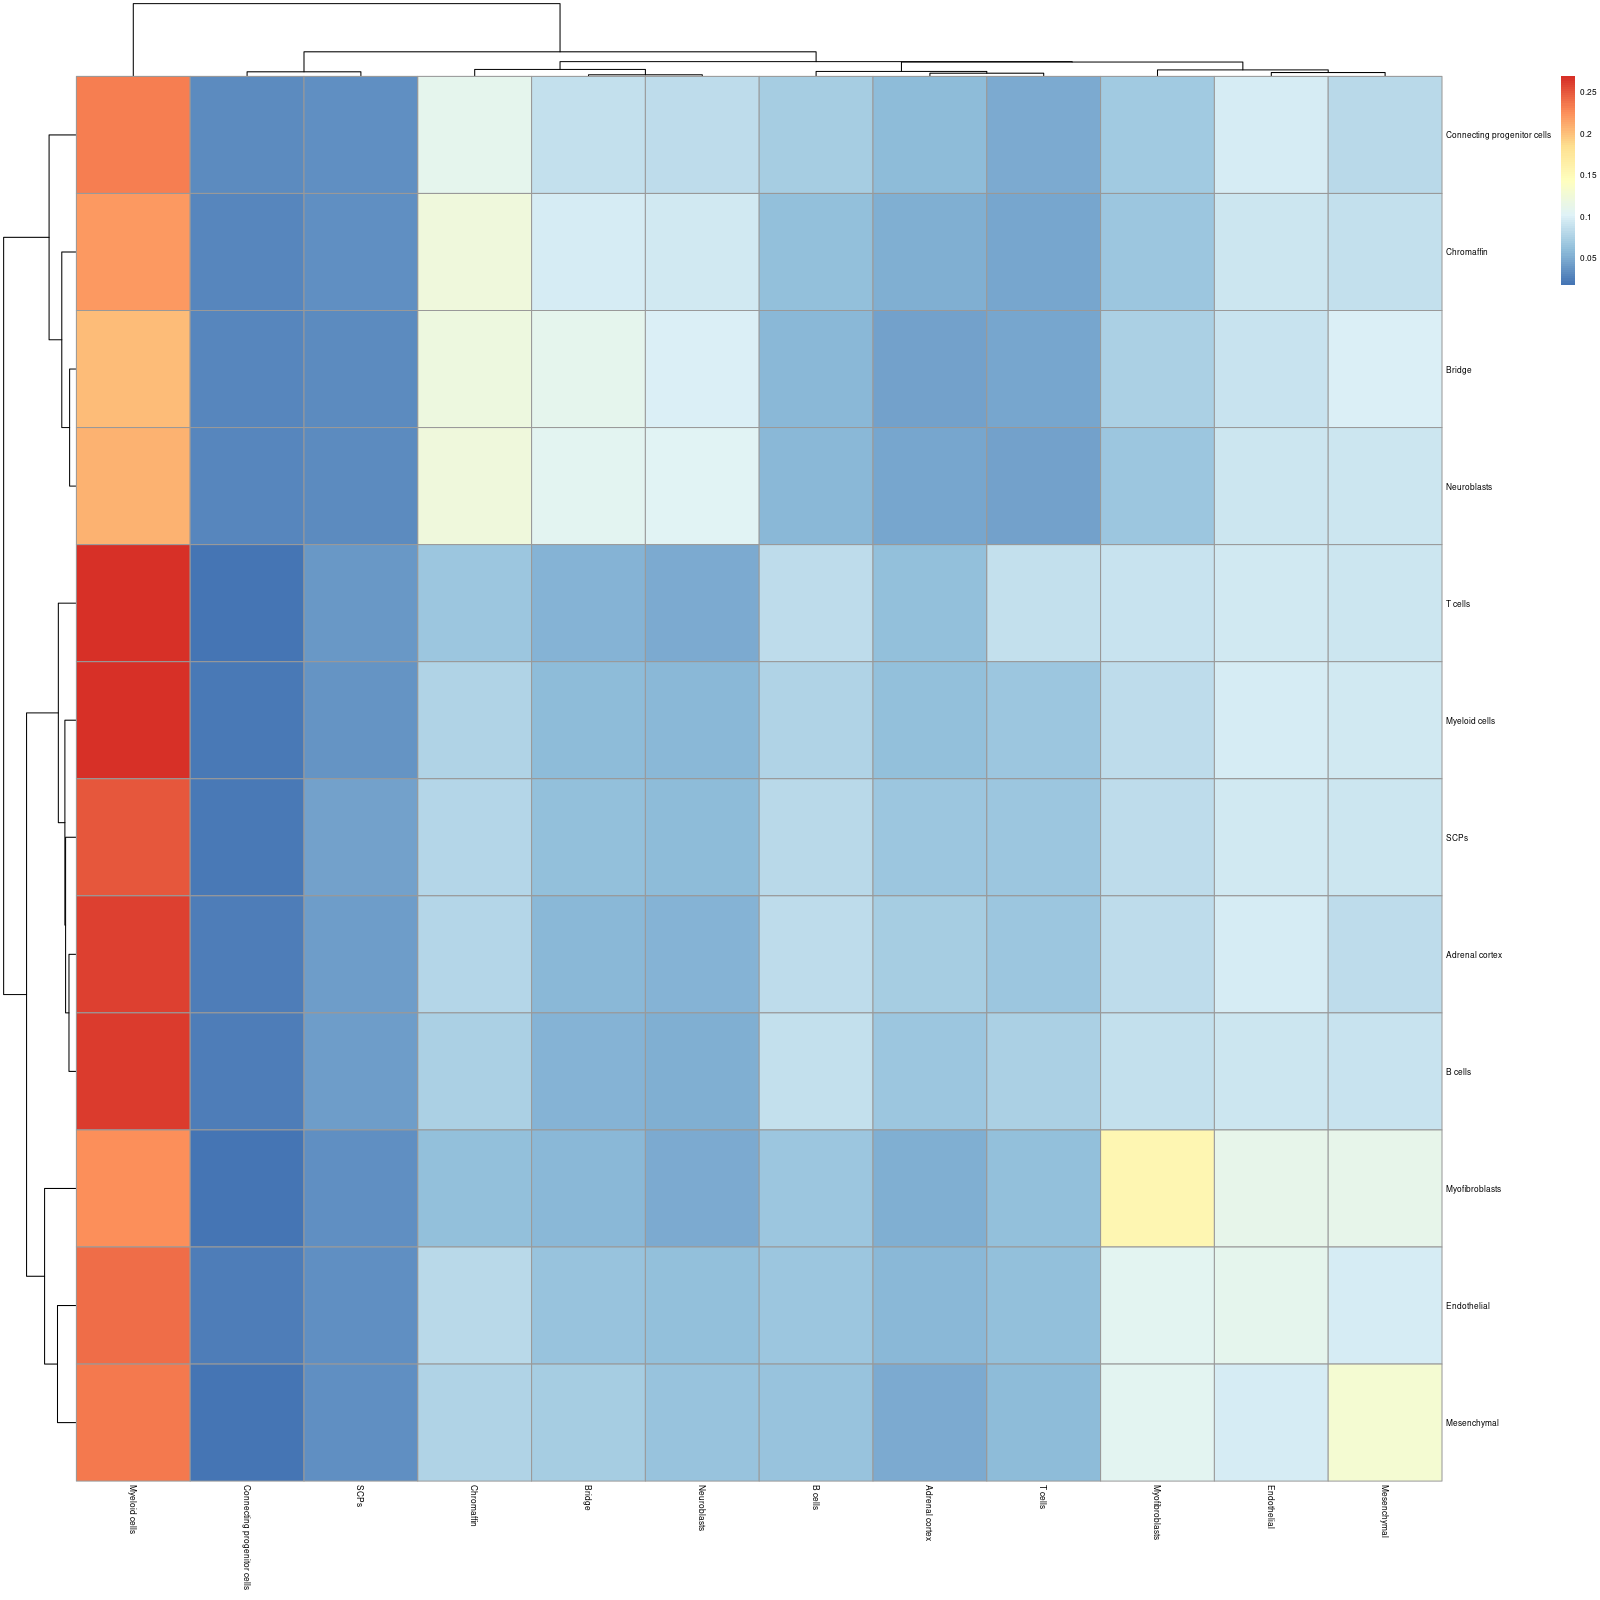

In [39]:
# Plot matrix
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

setwd('/project/data/gew123/Spatial/Figures/catscradle')
ggsave(filename="neighborhood_heatmap_tissue01.png",
       plot=pheatmap(cellTypesPerCellTypeMatrixExtended,
                     fontsize=6), dpi=400)

Tissue 03 - stage 2/3

In [59]:
# Subset
tissue_03 <- subset(spatial, subset = tissue == "tissue_03")

In [60]:
# Setting idents
Idents(tissue_03) = tissue_03@meta.data$broad_annotations

In [62]:
# Plot
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
p <- DimPlot(tissue_03,raster=FALSE, pt.size=0.35, 
       cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31')) + theme(axis.title=element_text(size=25),
                axis.text=element_text(size=20), 
                plot.title=element_text(size=35, hjust = 0.5),
                legend.text=element_text(size=25),
                legend.title=element_text(size=25, face = "bold")) +
# Setting labels
labs(
    x = "UMAP 1",
    y = "UMAP 2",
    color = "Cell Type",
    title = "Tissue 03\n",
  ) + guides(color = guide_legend(override.aes = list(size = 5)))

ggsave(filename = "/project/data/gew123/Spatial/Figures/catscradle/dimplots/dimplot_tissue_03.png",
       plot = p, width = 20, height = 15, units = "in", dpi = 400)

In [63]:
# Extract cell centroids (coordinates)
cell_centroids = data.frame(y = tissue_03$CenterX_global_px, x = tissue_03$CenterY_global_px, cell = colnames(tissue_03))
centroid_data = list("centroids" = CreateCentroids(cell_centroids))
coords = CreateFOV(coords = centroid_data, type = c("centroids"), assay = "RNA")

tissue_03[["global"]] = coords

centroids = GetTissueCoordinates(tissue_03)
rownames(centroids) = centroids$cell
clusters = tissue_03@active.ident

Warning message:
“Adding image data that isn't associated with any assays”


In [64]:
delaunayNeighbours = computeNeighboursDelaunay(centroids)
head(delaunayNeighbours)

# Can also get extended neighbors
extendedNeighboursList = getExtendedNBHDs(delaunayNeighbours, 4)
extendedNeighbours = collapseExtendedNBHDs(extendedNeighboursList, 4)

nodeA   nodeB  
1 225_48  236_48 
2 785_41  1058_41
3 1058_41 1105_41
4 94_48   238_48 
5 236_48  238_48 
6 132_45  158_45

radius 2
radius 3
radius 4


In [65]:
# Compute extended neighborhood by cell type matrix
NBHDByCTMatrixExtended = 
  computeNBHDByCTMatrix(extendedNeighbours, clusters)

# Compute extended contacts matrix
cellTypesPerCellTypeMatrixExtended = computeCellTypesPerCellTypeMatrix(NBHDByCTMatrixExtended, clusters)

In [67]:
# Plot network graph and save
setwd('/project/data/gew123/Spatial/Figures/catscradle')
colours = DiscretePalette(length(levels(clusters)), palette = "polychrome")
names(colours) = levels(clusters)

png(filename = "network_tissue03.png", width = 1000, height = 1000)
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)
cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrixExtended,
    minWeight = 0.05, colours = colours)
dev.off()

IGRAPH 1527b29 DNW- 12 97 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from 1527b29 (vertex names):
 [1] Adrenal cortex->B cells        Adrenal cortex->Bridge        
 [3] Adrenal cortex->Chromaffin     Adrenal cortex->Endothelial   
 [5] Adrenal cortex->Mesenchymal    Adrenal cortex->Myeloid cells 
 [7] Adrenal cortex->Myofibroblasts Adrenal cortex->Neuroblasts   
 [9] Adrenal cortex->T cells        B cells       ->Adrenal cortex
[11] B cells       ->Bridge         B cells       ->Chromaffin    
[13] B cells       ->Endothelial    B cells       ->Mesenchymal   
+ ... omitted several edges

png 
  2

Saving 6.67 x 6.67 in image


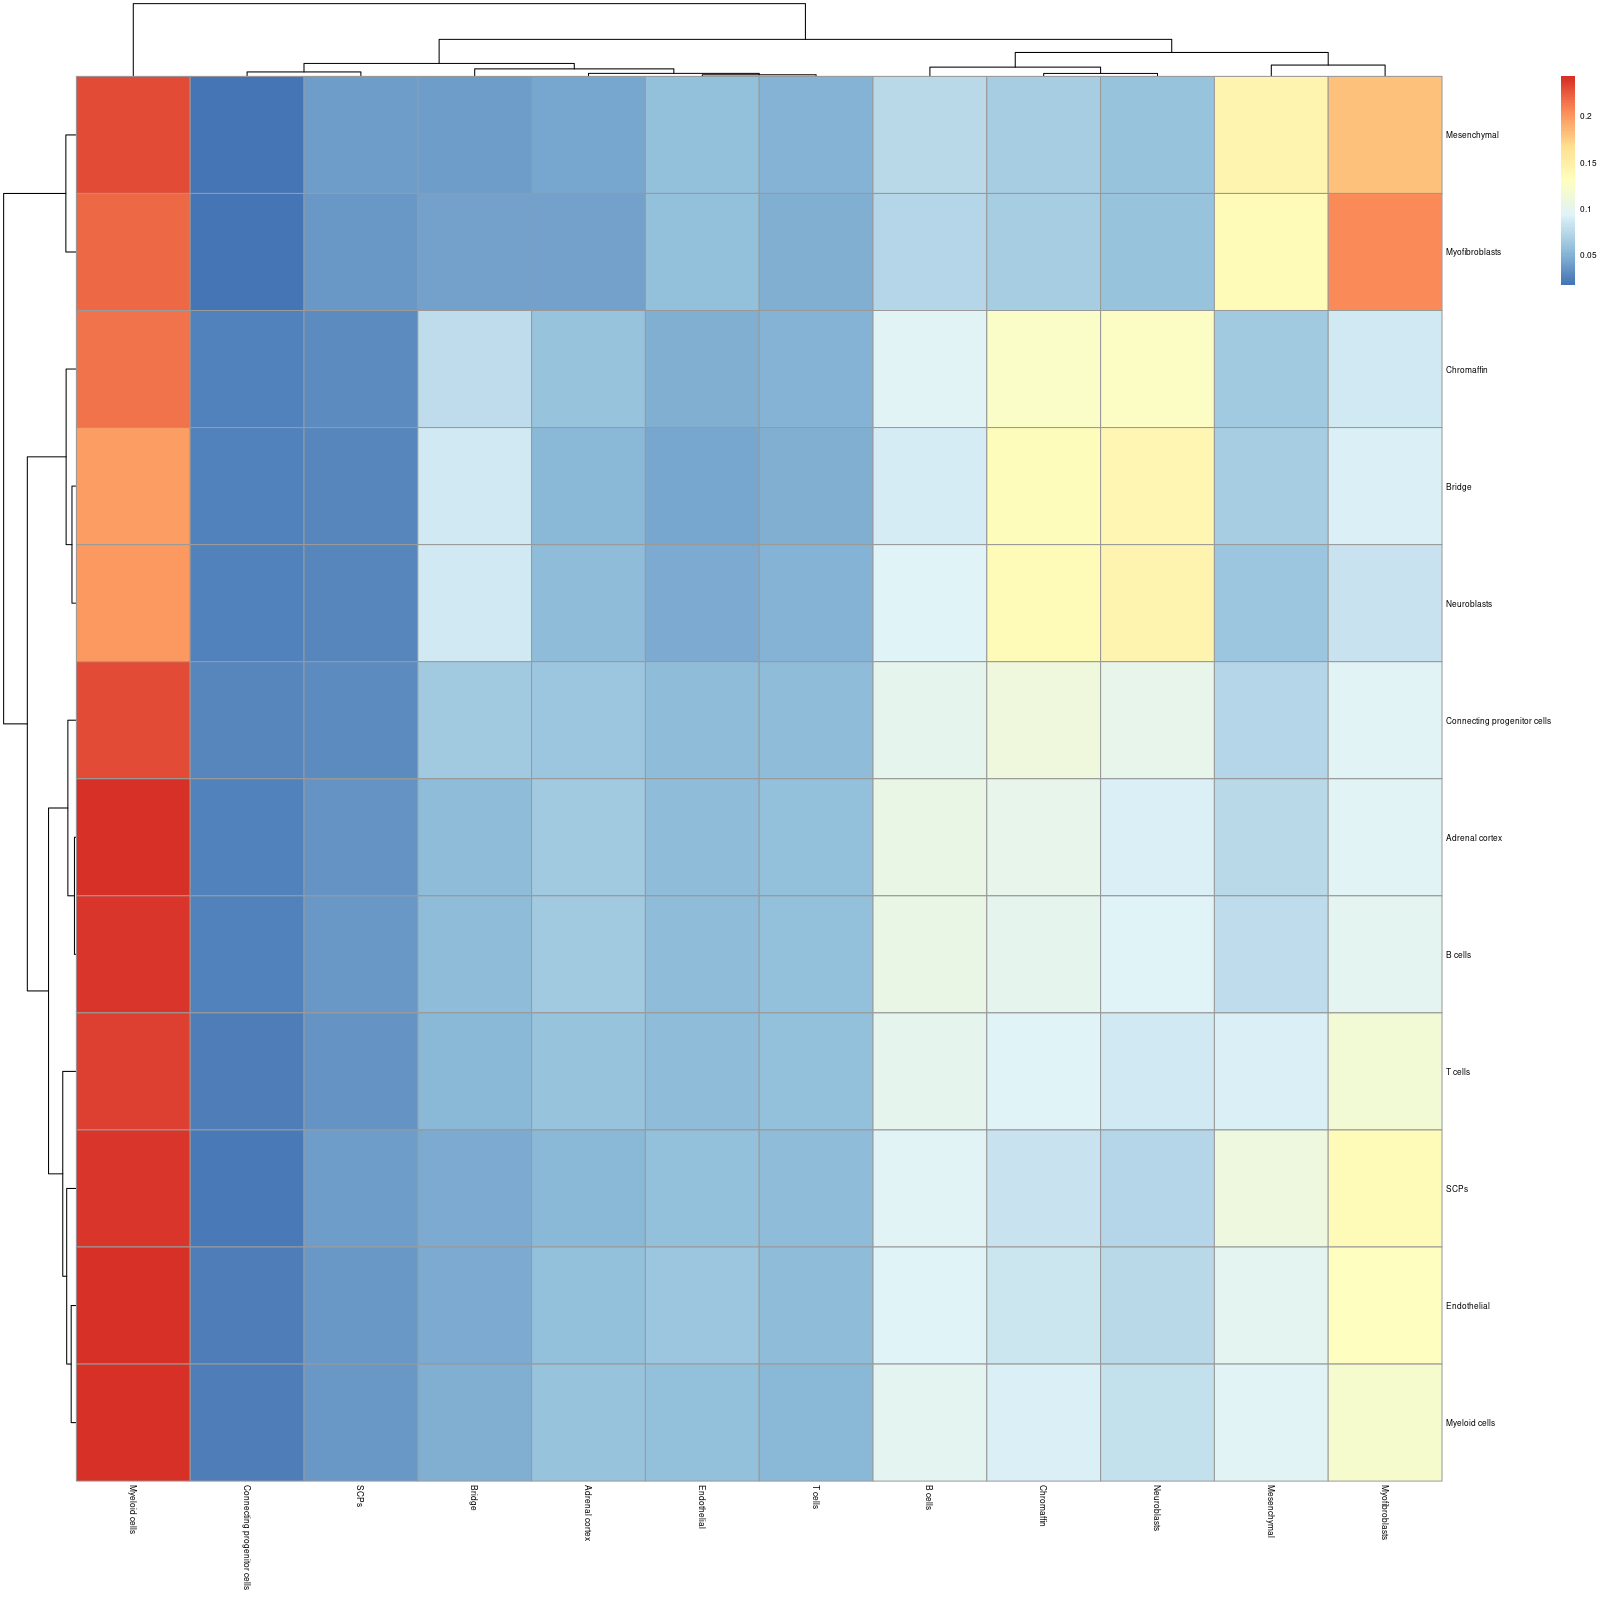

In [66]:
# Plot matrix
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

setwd('/project/data/gew123/Spatial/Figures/catscradle')
ggsave(filename="neighborhood_heatmap_tissue03.png",
       plot=pheatmap(cellTypesPerCellTypeMatrixExtended,
                     fontsize=6), dpi=400)

Tissue 08 - stage 3

In [68]:
# Subset
tissue_08 <- subset(spatial, subset = tissue == "tissue_08")

In [69]:
# Setting idents
Idents(tissue_08) = tissue_08@meta.data$broad_annotations

In [70]:
# Plot
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
p <- DimPlot(tissue_08,raster=FALSE, pt.size=0.35, 
       cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31')) + theme(axis.title=element_text(size=25),
                axis.text=element_text(size=20), 
                plot.title=element_text(size=35, hjust = 0.5),
                legend.text=element_text(size=25),
                legend.title=element_text(size=25, face = "bold")) +
# Setting labels
labs(
    x = "UMAP 1",
    y = "UMAP 2",
    color = "Cell Type",
    title = "Tissue 08\n",
  ) + guides(color = guide_legend(override.aes = list(size = 5)))

ggsave(filename = "/project/data/gew123/Spatial/Figures/catscradle/dimplots/dimplot_tissue_08.png",
       plot = p, width = 20, height = 15, units = "in", dpi = 400)

In [71]:
# Extract cell centroids (coordinates)
cell_centroids = data.frame(y = tissue_08$CenterX_global_px, x = tissue_08$CenterY_global_px, cell = colnames(tissue_08))
centroid_data = list("centroids" = CreateCentroids(cell_centroids))
coords = CreateFOV(coords = centroid_data, type = c("centroids"), assay = "RNA")

tissue_08[["global"]] = coords

centroids = GetTissueCoordinates(tissue_08)
rownames(centroids) = centroids$cell
clusters = tissue_08@active.ident

Warning message:
“Adding image data that isn't associated with any assays”


In [72]:
delaunayNeighbours = computeNeighboursDelaunay(centroids)
head(delaunayNeighbours)

# Can also get extended neighbors
extendedNeighboursList = getExtendedNBHDs(delaunayNeighbours, 4)
extendedNeighbours = collapseExtendedNBHDs(extendedNeighboursList, 4)

nodeA   nodeB  
1 710_113 282_117
2 141_113 171_113
3 1_116   17_116 
4 475_125 539_125
5 163_113 171_113
6 233_115 235_115

radius 2
radius 3
radius 4


In [73]:
# Compute extended neighborhood by cell type matrix
NBHDByCTMatrixExtended = 
  computeNBHDByCTMatrix(extendedNeighbours, clusters)

# Compute extended contacts matrix
cellTypesPerCellTypeMatrixExtended = computeCellTypesPerCellTypeMatrix(NBHDByCTMatrixExtended, clusters)

In [75]:
# Plot network graph and save
setwd('/project/data/gew123/Spatial/Figures/catscradle')
colours = DiscretePalette(length(levels(clusters)), palette = "polychrome")
names(colours) = levels(clusters)

png(filename = "network_tissue08.png", width = 1000, height = 1000)
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)
cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrixExtended,
    minWeight = 0.05, colours = colours)
dev.off()

IGRAPH 8b70da1 DNW- 12 86 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from 8b70da1 (vertex names):
 [1] Adrenal cortex->B cells        Adrenal cortex->Bridge        
 [3] Adrenal cortex->Chromaffin     Adrenal cortex->Endothelial   
 [5] Adrenal cortex->Myeloid cells  Adrenal cortex->Myofibroblasts
 [7] Adrenal cortex->Neuroblasts    Adrenal cortex->SCPs          
 [9] Adrenal cortex->T cells        B cells       ->Adrenal cortex
[11] B cells       ->Bridge         B cells       ->Chromaffin    
[13] B cells       ->Endothelial    B cells       ->Myeloid cells 
+ ... omitted several edges

png 
  2

Saving 6.67 x 6.67 in image


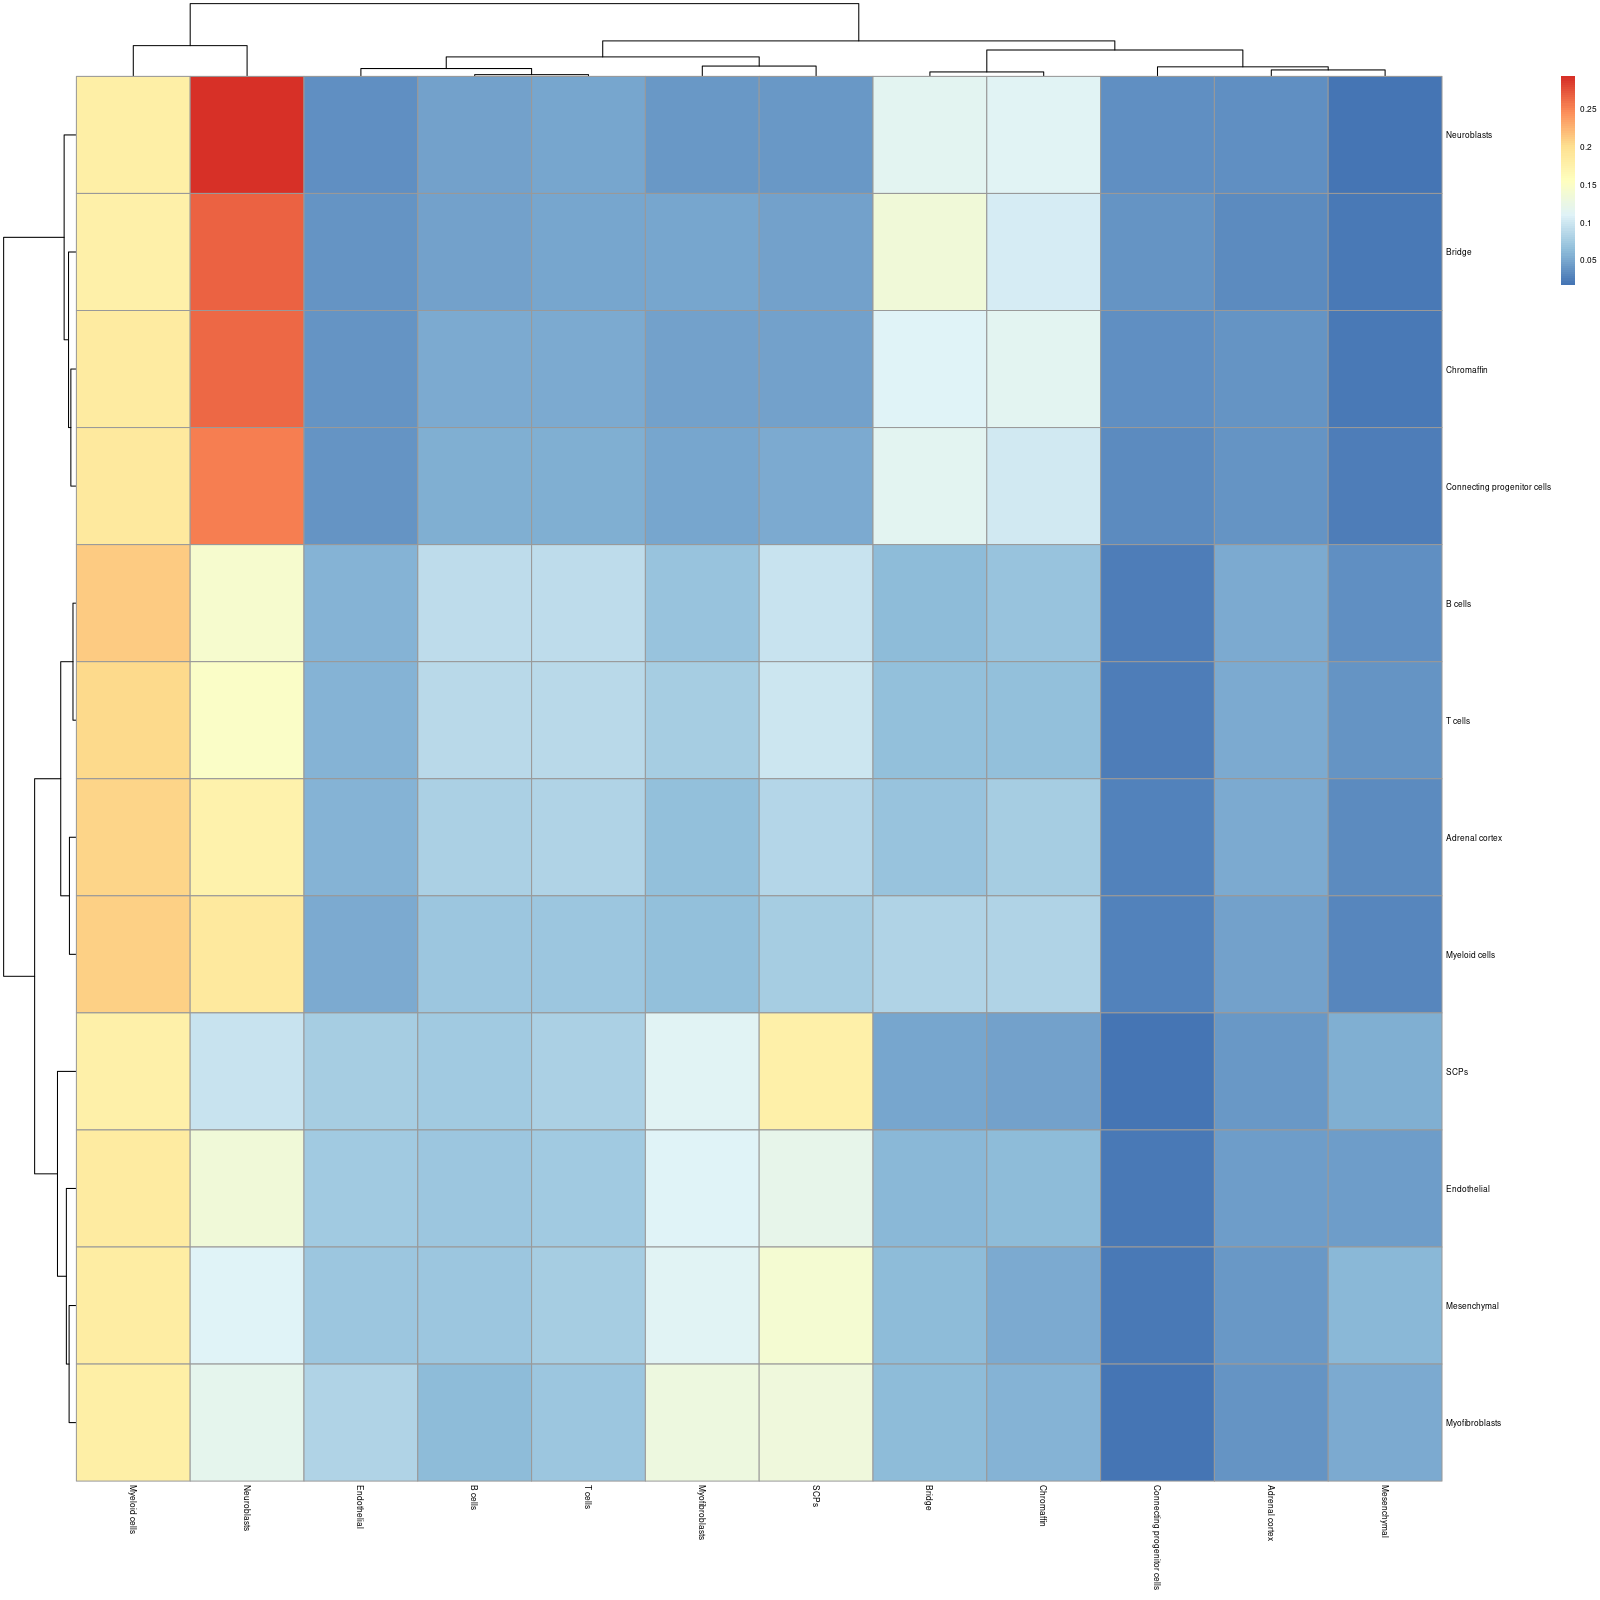

In [74]:
# Plot matrix
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

setwd('/project/data/gew123/Spatial/Figures/catscradle')
ggsave(filename="neighborhood_heatmap_tissue08.png",
       plot=pheatmap(cellTypesPerCellTypeMatrixExtended,
                     fontsize=6), dpi=400)

Tissue 05 - stage 4

In [76]:
# Subset
tissue_05 <- subset(spatial, subset = tissue == "tissue_05")

In [77]:
# Setting idents
Idents(tissue_05) = tissue_05@meta.data$broad_annotations

In [78]:
# Plot
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
p <- DimPlot(tissue_05,raster=FALSE, pt.size=0.35, 
       cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31')) + theme(axis.title=element_text(size=25),
                axis.text=element_text(size=20), 
                plot.title=element_text(size=35, hjust = 0.5),
                legend.text=element_text(size=25),
                legend.title=element_text(size=25, face = "bold")) +
# Setting labels
labs(
    x = "UMAP 1",
    y = "UMAP 2",
    color = "Cell Type",
    title = "Tissue 05\n",
  ) + guides(color = guide_legend(override.aes = list(size = 5)))

ggsave(filename = "/project/data/gew123/Spatial/Figures/catscradle/dimplots/dimplot_tissue_05.png",
       plot = p, width = 20, height = 15, units = "in", dpi = 400)

In [79]:
# Extract cell centroids (coordinates)
cell_centroids = data.frame(y = tissue_05$CenterX_global_px, x = tissue_05$CenterY_global_px, cell = colnames(tissue_05))
centroid_data = list("centroids" = CreateCentroids(cell_centroids))
coords = CreateFOV(coords = centroid_data, type = c("centroids"), assay = "RNA")

tissue_05[["global"]] = coords

centroids = GetTissueCoordinates(tissue_05)
rownames(centroids) = centroids$cell
clusters = tissue_05@active.ident

Warning message:
“Adding image data that isn't associated with any assays”


In [80]:
delaunayNeighbours = computeNeighboursDelaunay(centroids)
head(delaunayNeighbours)

# Can also get extended neighbors
extendedNeighboursList = getExtendedNBHDs(delaunayNeighbours, 4)
extendedNeighbours = collapseExtendedNBHDs(extendedNeighboursList, 4)

nodeA  nodeB 
1 965_76 155_80
2 965_76 244_80
3 830_72 979_72
4 10_68  25_68 
5 364_68 397_68
6 122_65 127_65

radius 2
radius 3
radius 4


In [81]:
# Compute extended neighborhood by cell type matrix
NBHDByCTMatrixExtended = 
  computeNBHDByCTMatrix(extendedNeighbours, clusters)

# Compute extended contacts matrix
cellTypesPerCellTypeMatrixExtended = computeCellTypesPerCellTypeMatrix(NBHDByCTMatrixExtended, clusters)

In [83]:
# Plot network graph and save
setwd('/project/data/gew123/Spatial/Figures/catscradle')
colours = DiscretePalette(length(levels(clusters)), palette = "polychrome")
names(colours) = levels(clusters)

png(filename = "network_tissue05.png", width = 1000, height = 1000)
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)
cellTypesPerCellTypeGraphFromCellMatrix(cellTypesPerCellTypeMatrixExtended,
    minWeight = 0.05, colours = colours)
dev.off()

IGRAPH fb7afd7 DNW- 12 89 -- 
+ attr: coords (g/n), name (v/c), color (v/c), weight (e/n), width
| (e/n)
+ edges from fb7afd7 (vertex names):
 [1] Adrenal cortex->B cells        Adrenal cortex->Bridge        
 [3] Adrenal cortex->Chromaffin     Adrenal cortex->Endothelial   
 [5] Adrenal cortex->Myeloid cells  Adrenal cortex->Myofibroblasts
 [7] Adrenal cortex->Neuroblasts    Adrenal cortex->T cells       
 [9] B cells       ->Adrenal cortex B cells       ->Bridge        
[11] B cells       ->Chromaffin     B cells       ->Endothelial   
[13] B cells       ->Myeloid cells  B cells       ->Myofibroblasts
+ ... omitted several edges

png 
  2

Saving 6.67 x 6.67 in image


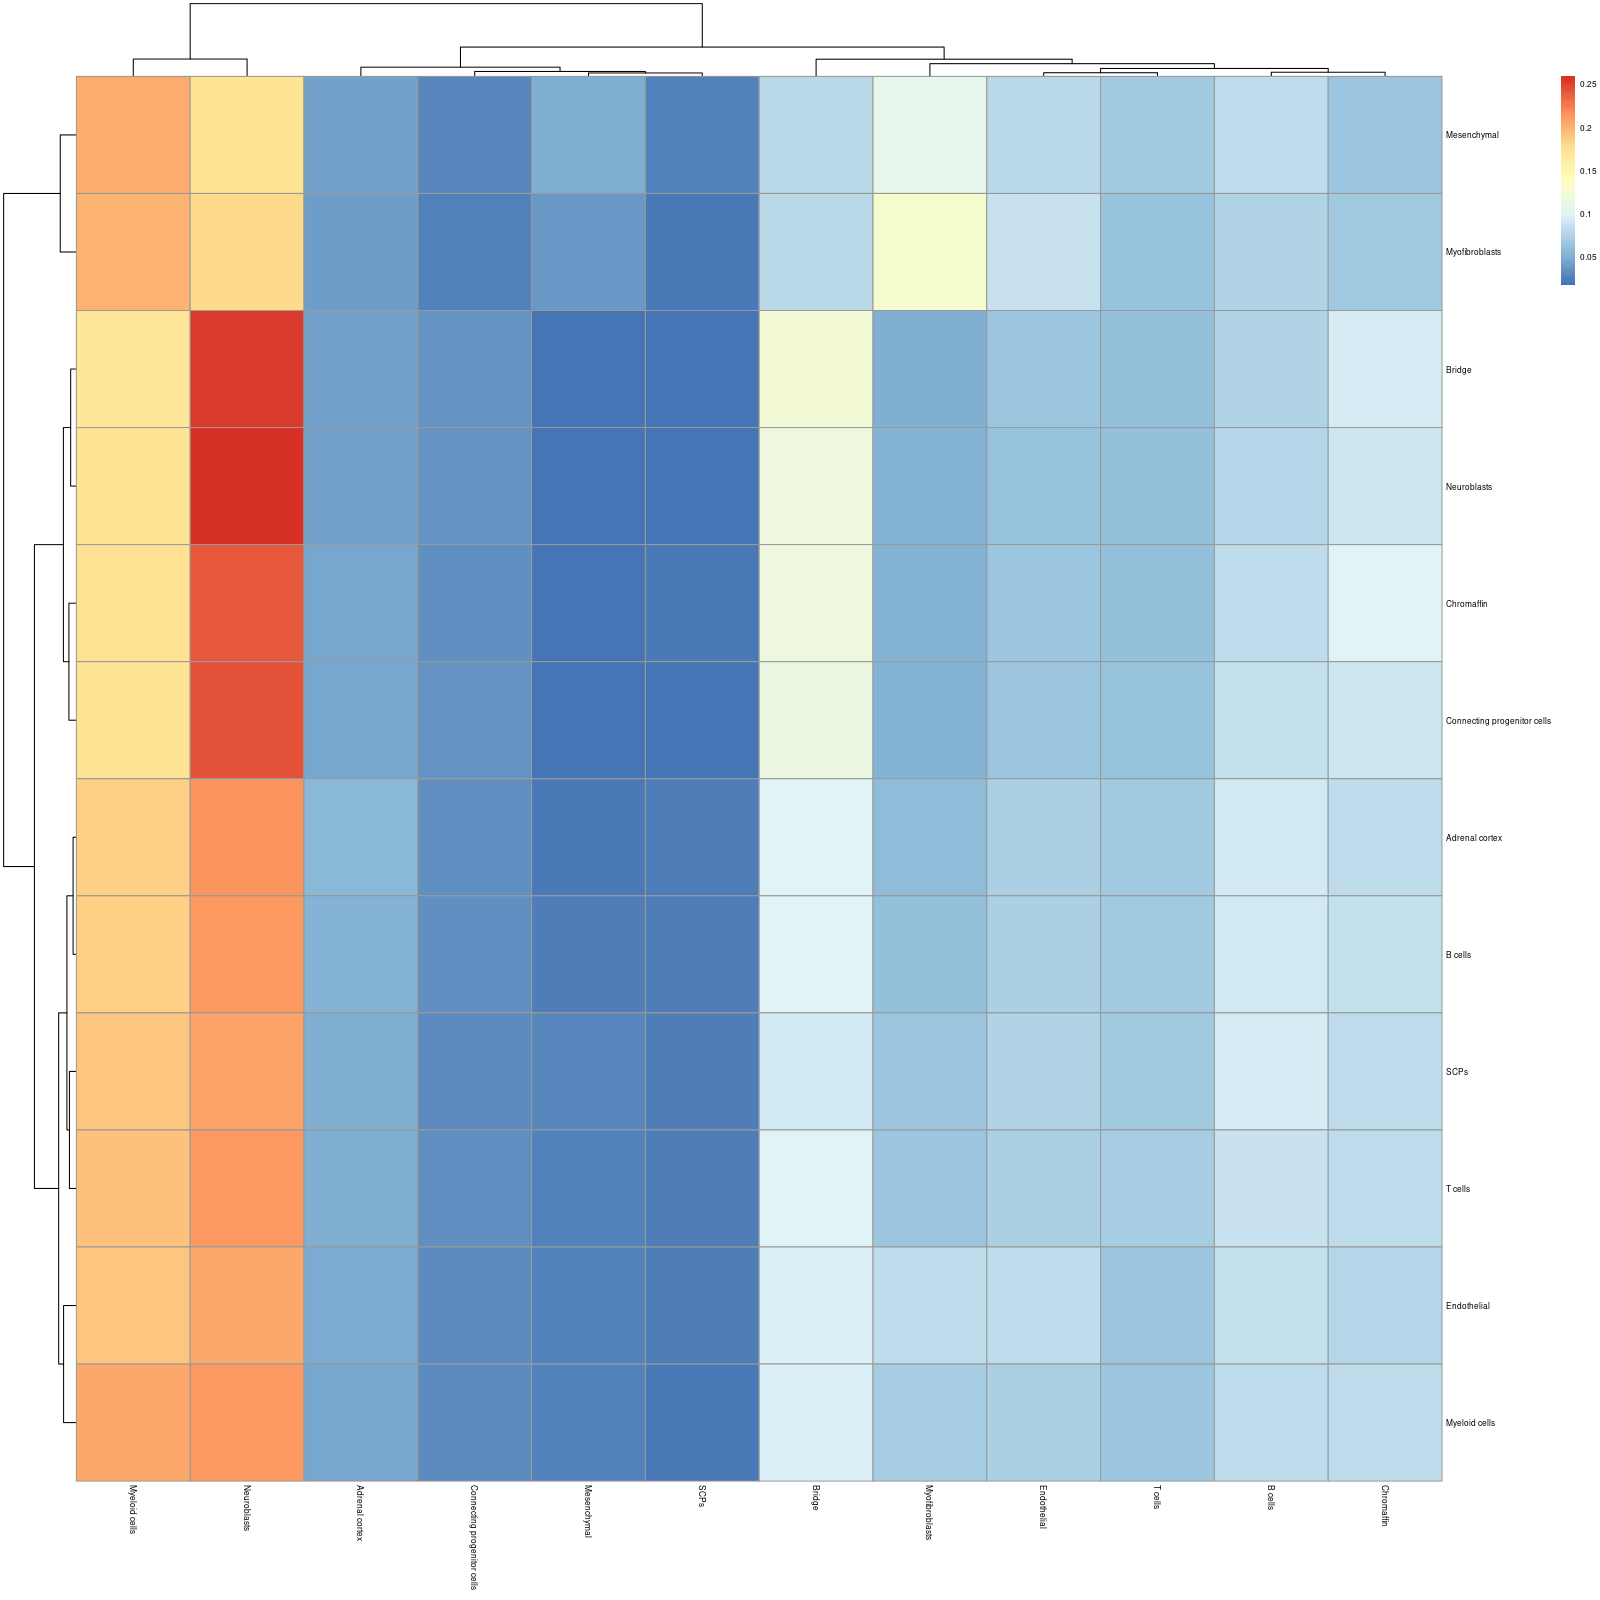

In [82]:
# Plot matrix
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

setwd('/project/data/gew123/Spatial/Figures/catscradle')
ggsave(filename="neighborhood_heatmap_tissue05.png",
       plot=pheatmap(cellTypesPerCellTypeMatrixExtended,
                     fontsize=6), dpi=400)